In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BRA.csv')
df.head()

Country   League  Season        Date   Time          Home         Away   HG  \
0  Brazil  Serie A    2012  19/05/2012  22:30     Palmeiras   Portuguesa  1.0   
1  Brazil  Serie A    2012  19/05/2012  22:30  Sport Recife  Flamengo RJ  1.0   
2  Brazil  Serie A    2012  20/05/2012  01:00   Figueirense      Nautico  2.0   
3  Brazil  Serie A    2012  20/05/2012  20:00   Botafogo RJ    Sao Paulo  4.0   
4  Brazil  Serie A    2012  20/05/2012  20:00   Corinthians   Fluminense  0.0   

    AG Res  ...  MaxCA  AvgCH  AvgCD  AvgCA  BFECH  BFECD  BFECA  B365CH  \
0  1.0   D  ...   5.31   1.69   3.50   4.90    NaN    NaN    NaN     NaN   
1  1.0   D  ...   2.70   2.59   3.23   2.58    NaN    NaN    NaN     NaN   
2  1.0   H  ...   7.22   1.59   3.67   5.64    NaN    NaN    NaN     NaN   
3  2.0   H  ...   3.15   2.35   3.26   2.84    NaN    NaN    NaN     NaN   
4  1.0   A  ...   4.41   1.89   3.33   3.89    NaN    NaN    NaN     NaN   

   B365CD  B36CA  
0     NaN    NaN  
1     NaN    NaN  
2     NaN    NaN  
3     NaN    NaN  
4     NaN    NaN  

[5 rows x 25 columns]

In [2]:
# prompt: drop BFECH	BFECD	BFECA

df = df.drop(['BFECH', 'BFECD', 'BFECA'], axis=1)
df.head()

Country   League  Season       Date      Time          Home         Away  \
0  Brazil  Serie A    2012 2012-05-19  22:30:00     Palmeiras   Portuguesa   
1  Brazil  Serie A    2012 2012-05-19  22:30:00  Sport Recife  Flamengo RJ   
2  Brazil  Serie A    2012 2012-05-20  01:00:00   Figueirense      Nautico   
3  Brazil  Serie A    2012 2012-05-20  20:00:00   Botafogo RJ    Sao Paulo   
4  Brazil  Serie A    2012 2012-05-20  20:00:00   Corinthians   Fluminense   

    HG   AG Res  PSCH  PSCD  PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  
0  1.0  1.0   D  1.75  3.86  5.25   1.76   3.87   5.31   1.69   3.50   4.90  
1  1.0  1.0   D  2.83  3.39  2.68   2.83   3.42   2.70   2.59   3.23   2.58  
2  2.0  1.0   H  1.60  4.04  6.72   1.67   4.05   7.22   1.59   3.67   5.64  
3  4.0  2.0   H  2.49  3.35  3.15   2.49   3.39   3.15   2.35   3.26   2.84  
4  0.0  1.0   A  1.96  3.53  4.41   1.96   3.53   4.41   1.89   3.33   3.89

In [3]:
res_map = {'H': 0, 'D': 1, 'A': 1}
df['Res_num'] = df['Res'].map(res_map)


In [4]:
df.dropna(inplace=True)
df.head()

Country   League  Season       Date      Time          Home         Away  \
0  Brazil  Serie A    2012 2012-05-19  22:30:00     Palmeiras   Portuguesa   
1  Brazil  Serie A    2012 2012-05-19  22:30:00  Sport Recife  Flamengo RJ   
2  Brazil  Serie A    2012 2012-05-20  01:00:00   Figueirense      Nautico   
3  Brazil  Serie A    2012 2012-05-20  20:00:00   Botafogo RJ    Sao Paulo   
4  Brazil  Serie A    2012 2012-05-20  20:00:00   Corinthians   Fluminense   

    HG   AG Res  PSCH  PSCD  PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  \
0  1.0  1.0   D  1.75  3.86  5.25   1.76   3.87   5.31   1.69   3.50   4.90   
1  1.0  1.0   D  2.83  3.39  2.68   2.83   3.42   2.70   2.59   3.23   2.58   
2  2.0  1.0   H  1.60  4.04  6.72   1.67   4.05   7.22   1.59   3.67   5.64   
3  4.0  2.0   H  2.49  3.35  3.15   2.49   3.39   3.15   2.35   3.26   2.84   
4  0.0  1.0   A  1.96  3.53  4.41   1.96   3.53   4.41   1.89   3.33   3.89   

   Res_num  
0      1.0  
1      1.0  
2      0.0  
3      0.0  
4      1.0

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
X = df[['PSCH', 'PSCD', 'PSCA']]  # features
y = df['Res_num']  # vari√°vel alvo

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [7]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5) # Using 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.54411765 0.53235294 0.57114818 0.55839058 0.55740922]
Mean cross-validation score: 0.5526837152918086


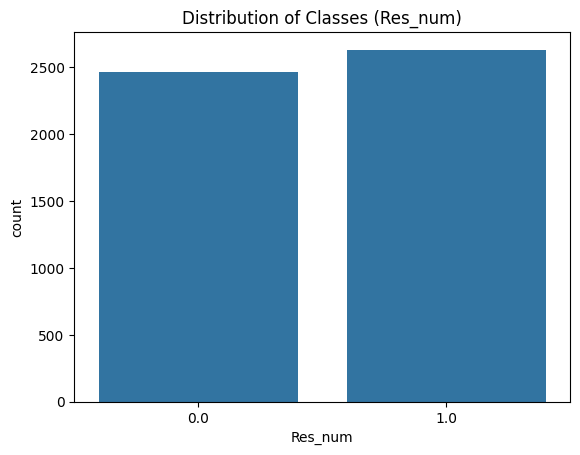

In [8]:
sns.countplot(x='Res_num', data=df)
plt.title('Distribution of Classes (Res_num)')
plt.show()

Res_num
1.0    2630
0.0    2467
Name: count, dtype: int64

Class distribution after downsampling:
Res_num
1.0    2467
0.0    2467
Name: count, dtype: int64

Cross-validation scores on balanced data: [0.56352584 0.56413374 0.54744526]
Mean cross-validation score on balanced data: 0.5583682766475125


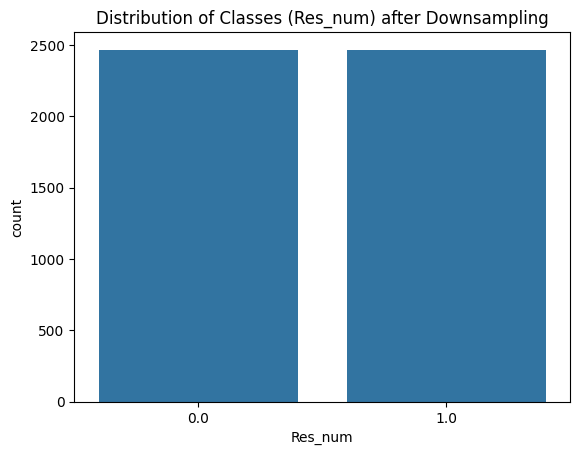

In [9]:
# prompt: reduce first class

# Check class distribution in the target variable
print(df['Res_num'].value_counts())

# Identify the majority class
majority_class = df['Res_num'].value_counts().idxmax()
minority_classes = df['Res_num'].value_counts().index.tolist()
minority_classes.remove(majority_class)

# Calculate the target count for the majority class after downsampling
# Here, we aim to match the count of the largest minority class
target_count = df['Res_num'].value_counts().max()

# Separate majority and minority classes
df_majority = df[df['Res_num'] == majority_class]
df_minority = df[df['Res_num'].isin(minority_classes)]

# Randomly sample from the majority class
# Reduce the majority class to match the count of the next largest class (assuming you want to reduce the majority class)
# Let's find the second largest class count as the target for the majority class.
if len(df['Res_num'].value_counts()) > 1:
    target_count_for_majority = df['Res_num'].value_counts().iloc[1] # Count of the second most frequent class
else:
    target_count_for_majority = len(df_majority) # No other classes, no need to resample

df_majority_downsampled = df_majority.sample(n=target_count_for_majority, random_state=42)

# Concatenate the downsampled majority class dataframe with the minority class dataframes
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset to ensure the data is not ordered by class
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nClass distribution after downsampling:")
print(df_balanced['Res_num'].value_counts())

# Now use the balanced dataframe for your modeling
X_balanced = df_balanced[['PSCH', 'PSCD', 'PSCA']]  # features from balanced df
y_balanced = df_balanced['Res_num']  # target from balanced df

# Perform cross-validation on the balanced dataset
cv_scores_balanced = cross_val_score(knn, X_balanced, y_balanced, cv=3) # Using 5-fold cross-validation

print("\nCross-validation scores on balanced data:", cv_scores_balanced)
print("Mean cross-validation score on balanced data:", cv_scores_balanced.mean())

# Visualize the distribution of classes after downsampling
sns.countplot(x='Res_num', data=df_balanced)
plt.title('Distribution of Classes (Res_num) after Downsampling')
plt.show()

In [10]:
# prompt: just catch since 2020

#df['Date'] = pd.to_datetime(df['Date'])
#df = df[df['Date'].dt.year >= 2022].copy()

In [11]:
X = df[['AvgCH', 'AvgCD', 'AvgCA', 'PSCH', 'PSCD', 'PSCA']]  # features
y = df['Res_num']  # vari√°vel alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Previs√µes
y_pred = knn.predict(X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[548 444]
 [435 612]]
              precision    recall  f1-score   support

         0.0       0.56      0.55      0.55       992
         1.0       0.58      0.58      0.58      1047

    accuracy                           0.57      2039
   macro avg       0.57      0.57      0.57      2039
weighted avg       0.57      0.57      0.57      2039



In [13]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5) # Using 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.55882353 0.54607843 0.55544652 0.55642787 0.56329735]
Mean cross-validation score: 0.5560147395562739


Melhor K encontrado: 12

Matriz de Confus√£o:
[[377 155]
 [246 198]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

N√£o Mandante       0.61      0.71      0.65       532
    Mandante       0.56      0.45      0.50       444

    accuracy                           0.59       976
   macro avg       0.58      0.58      0.57       976
weighted avg       0.59      0.59      0.58       976



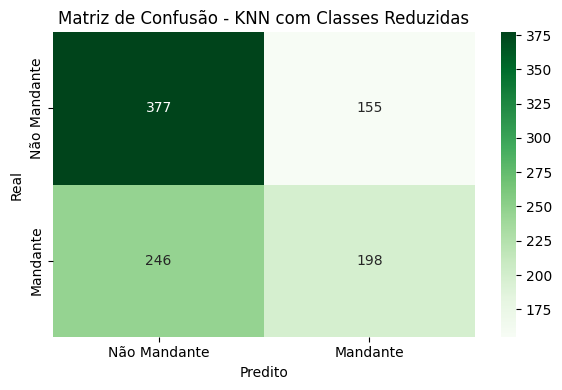

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'].dt.year >= 2019].copy()


# =======================
# REDU√á√ÉO DE CLASSES
# =======================
# 1 = vit√≥ria do mandante (H), 0 = empate ou vit√≥ria do visitante (D ou A)
df['Res_num'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

# =======================
# FEATURES DERIVADAS
# =======================
df['H_delta_max_avg'] = df['MaxCH'] - df['AvgCH']
df['H_delta_psc_avg'] = df['PSCH'] - df['AvgCH']
df['H_spread'] = df[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)

df['D_delta_max_avg'] = df['MaxCD'] - df['AvgCD']
df['D_delta_psc_avg'] = df['PSCD'] - df['AvgCD']
df['D_spread'] = df[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)

df['A_delta_max_avg'] = df['MaxCA'] - df['AvgCA']
df['A_delta_psc_avg'] = df['PSCA'] - df['AvgCA']
df['A_spread'] = df[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

features = [
    'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
    'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
    'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
]

X = df[features]
y = df['Res_num']

# =======================
# TREINO / TESTE
# =======================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =======================
# OTIMIZA√á√ÉO DO K
# =======================
# C√ìDIGO CORRIGIDO PARA REPRODUTIBILIDADE
from sklearn.model_selection import StratifiedKFold

k_range = range(3, 21)
cv_scores = []

# 1. Crie um objeto de valida√ß√£o cruzada com estado aleat√≥rio fixo
cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 2. Passe o 'cv_splitter' para o par√¢metro cv. Agora a divis√£o ser√° sempre a mesma.
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv_splitter, scoring='accuracy')
    cv_scores.append(scores.mean())

# Melhor k
best_k = k_range[np.argmax(cv_scores)]
print(f"Melhor K encontrado: {best_k}")

# =======================
# TREINAMENTO FINAL
# =======================
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# =======================
# RELAT√ìRIO
# =======================
print("\nMatriz de Confus√£o:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred, target_names=['N√£o Mandante', 'Mandante']))

# =======================
# PLOT MATRIZ DE CONFUS√ÉO
# =======================
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['N√£o Mandante', 'Mandante'],
            yticklabels=['N√£o Mandante', 'Mandante'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confus√£o - KNN com Classes Reduzidas')
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings

# Ignora avisos para manter a sa√≠da mais limpa durante o loop
warnings.filterwarnings('ignore', category=UserWarning)

# =======================================================
# ETAPA DE OTIMIZA√á√ÉO: ENCONTRAR O MELHOR ANO DE CORTE
# =======================================================
print("üöÄ Iniciando busca pelo melhor ano de corte (2012-2025)...")

# --- PR√â-REQUISITO ---
# Supondo que 'df' seja seu DataFrame j√° carregado.
# A linha abaixo garante que a coluna de data esteja no formato correto.
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
# ---------------------

# Guarda o DataFrame original para usar no loop
df_original = df.dropna(subset=['Date']).copy()

# Define o intervalo de anos para testar
years_to_test = range(2012, 2026) # de 2012 a 2025
results = {}

for year in years_to_test:
    print(f"\n--- ‚è≥ Testando com dados a partir de {year} ---")

    # 1. Filtra o DataFrame para o ano de corte atual
    df_filtered = df_original[df_original['Date'].dt.year >= year].copy()

    # 2. Verifica se h√° dados suficientes para prosseguir
    if len(df_filtered) < 100 or df_filtered['Res'].nunique() < 3:
        print(f"Dados insuficientes ou classes ausentes para o ano {year}. Pulando.")
        continue

    # 3. Pipeline de Engenharia de Features e Treinamento
    df_filtered['Res_bin'] = df_filtered['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # Features Derivadas
    df_filtered['H_delta_max_avg'] = df_filtered['MaxCH'] - df_filtered['AvgCH']
    df_filtered['H_delta_psc_avg'] = df_filtered['PSCH'] - df_filtered['AvgCH']
    df_filtered['H_spread'] = df_filtered[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
    df_filtered['D_delta_max_avg'] = df_filtered['MaxCD'] - df_filtered['AvgCD']
    df_filtered['D_delta_psc_avg'] = df_filtered['PSCD'] - df_filtered['AvgCD']
    df_filtered['D_spread'] = df_filtered[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
    df_filtered['A_delta_max_avg'] = df_filtered['MaxCA'] - df_filtered['AvgCA']
    df_filtered['A_delta_psc_avg'] = df_filtered['PSCA'] - df_filtered['AvgCA']
    df_filtered['A_spread'] = df_filtered[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

    features = [
        'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
        'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
        'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
    ]

    df_filtered.dropna(subset=features + ['Res_bin'], inplace=True)
    X = df_filtered[features]
    y = df_filtered['Res_bin']

    # Valida√ß√£o adicional de dados
    if len(y.unique()) < 2:
        print(f"Apenas uma classe presente ap√≥s limpeza para o ano {year}. Pulando.")
        continue

    # Divis√£o em Treino e Teste (com estratifica√ß√£o para garantir a propor√ß√£o das classes)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Otimiza√ß√£o do K para o conjunto de dados atual
    k_range = range(3, 21)
    cv_scores = []
    try:
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
            cv_scores.append(scores.mean())

        if not cv_scores: continue
        best_k = k_range[np.argmax(cv_scores)]

        # Treinamento e avalia√ß√£o
        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        results[year] = (accuracy, best_k) # Armazena a acur√°cia e o melhor k
        print(f"‚úÖ Resultado para {year}: Acur√°cia de {accuracy:.4f} (com melhor k={best_k})")

    except ValueError:
        print(f"Erro na valida√ß√£o cruzada para {year} (poucas amostras em alguma classe). Pulando.")
        continue

# =======================================================
# RESULTADO FINAL DA OTIMIZA√á√ÉO
# =======================================================
if not results:
    print("\nNenhum resultado v√°lido foi gerado. Verifique os dados de entrada e o intervalo de anos.")
else:
    # Encontra o melhor ano buscando pela maior acur√°cia (o primeiro item da tupla)
    best_year = max(results, key=lambda year: results[year][0])
    best_accuracy, best_k_final = results[best_year]

    print("\n\n=======================================================")
    print("üèÜ OTIMIZA√á√ÉO CONCLU√çDA üèÜ")
    print(f"Melhor ano de corte encontrado: {best_year}")
    print(f"üéØ Maior acur√°cia alcan√ßada: {best_accuracy:.4f}")
    print(f"üìà Melhor 'k' para este ano: {best_k_final}")
    print("=======================================================")

üöÄ Iniciando busca pelo melhor ano de corte (2012-2025)...

--- ‚è≥ Testando com dados a partir de 2012 ---
‚úÖ Resultado para 2012: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2013 ---
‚úÖ Resultado para 2013: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2014 ---
‚úÖ Resultado para 2014: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2015 ---
‚úÖ Resultado para 2015: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2016 ---
‚úÖ Resultado para 2016: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2017 ---
‚úÖ Resultado para 2017: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2018 ---
‚úÖ Resultado para 2018: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2019 ---
‚úÖ Resultado para 2019: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 202


Matriz de Confus√£o (Dados a partir de 2022):
[[137  57]
 [ 84  90]]


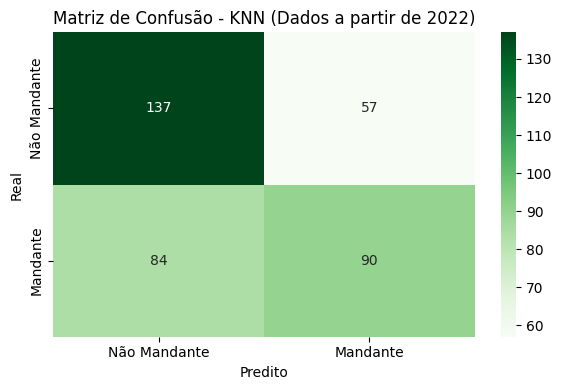


Relat√≥rio de Classifica√ß√£o (Dados a partir de 2022):
              precision    recall  f1-score   support

N√£o Mandante       0.62      0.71      0.66       194
    Mandante       0.61      0.52      0.56       174

    accuracy                           0.62       368
   macro avg       0.62      0.61      0.61       368
weighted avg       0.62      0.62      0.61       368



In [16]:
# prompt: do matrix confusion from 2022 to the last game

# Filter data for years from 2022 onwards
df_filtered_2022 = df_original[df_original['Date'].dt.year >= 2023].copy()

if len(df_filtered_2022) < 100 or df_filtered_2022['Res'].nunique() < 3:
    print("Dados insuficientes ou classes ausentes a partir de 2022. N√£o √© poss√≠vel gerar a matriz de confus√£o.")
else:
    # Apply the same feature engineering steps
    df_filtered_2022['Res_bin'] = df_filtered_2022['Res'].map({'H': 1, 'D': 0, 'A': 0})

    df_filtered_2022['H_delta_max_avg'] = df_filtered_2022['MaxCH'] - df_filtered_2022['AvgCH']
    df_filtered_2022['H_delta_psc_avg'] = df_filtered_2022['PSCH'] - df_filtered_2022['AvgCH']
    df_filtered_2022['H_spread'] = df_filtered_2022[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
    df_filtered_2022['D_delta_max_avg'] = df_filtered_2022['MaxCD'] - df_filtered_2022['AvgCD']
    df_filtered_2022['D_delta_psc_avg'] = df_filtered_2022['PSCD'] - df_filtered_2022['AvgCD']
    df_filtered_2022['D_spread'] = df_filtered_2022[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
    df_filtered_2022['A_delta_max_avg'] = df_filtered_2022['MaxCA'] - df_filtered_2022['AvgCA']
    df_filtered_2022['A_delta_psc_avg'] = df_filtered_2022['PSCA'] - df_filtered_2022['AvgCA']
    df_filtered_2022['A_spread'] = df_filtered_2022[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

    features = [
        'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
        'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
        'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
    ]

    df_filtered_2022.dropna(subset=features + ['Res_bin'], inplace=True)
    X_2022 = df_filtered_2022[features]
    y_2022 = df_filtered_2022['Res_bin']

    if len(y_2022.unique()) < 2:
        print("Apenas uma classe presente ap√≥s limpeza para dados a partir de 2022. N√£o √© poss√≠vel gerar a matriz de confus√£o.")
    else:
        # Split data (you can use the same split ratio, but on the filtered data)
        X_train_2022, X_test_2022, y_train_2022, y_test_2022 = train_test_split(
            X_2022, y_2022, test_size=0.4, random_state=42, stratify=y_2022
        )

        # Scale features
        scaler_2022 = StandardScaler()
        X_train_scaled_2022 = scaler_2022.fit_transform(X_train_2022)
        X_test_scaled_2022 = scaler_2022.transform(X_test_2022)

        # Use the best_k found during the optimization for this KNN model
        # (Assuming best_k_final from the previous optimization is the desired k)
        knn_2022 = KNeighborsClassifier(n_neighbors=best_k_final)
        knn_2022.fit(X_train_scaled_2022, y_train_2022)
        y_pred_2022 = knn_2022.predict(X_test_scaled_2022)

        # Generate Confusion Matrix
        cm_2022 = confusion_matrix(y_test_2022, y_pred_2022)

        print("\nMatriz de Confus√£o (Dados a partir de 2022):")
        print(cm_2022)

        # Plot Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm_2022, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['N√£o Mandante', 'Mandante'],
                    yticklabels=['N√£o Mandante', 'Mandante'])
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.title('Matriz de Confus√£o - KNN (Dados a partir de 2022)')
        plt.tight_layout()
        plt.show()

        print("\nRelat√≥rio de Classifica√ß√£o (Dados a partir de 2022):")
        print(classification_report(y_test_2022, y_pred_2022, target_names=['N√£o Mandante', 'Mandante']))

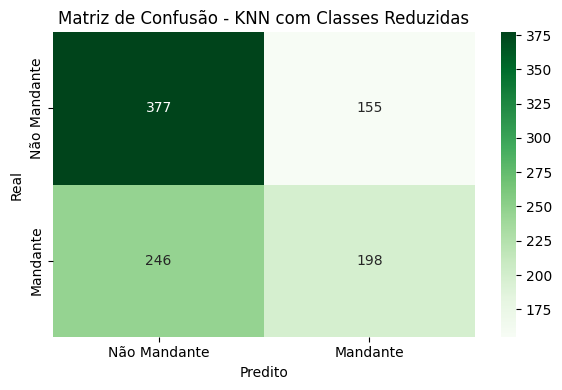

üöÄ Iniciando busca pelo melhor ano de corte (2012-2025)...

--- ‚è≥ Testando com dados a partir de 2012 ---
‚úÖ Resultado para 2012: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2013 ---
‚úÖ Resultado para 2013: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2014 ---
‚úÖ Resultado para 2014: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2015 ---
‚úÖ Resultado para 2015: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2016 ---
‚úÖ Resultado para 2016: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2017 ---
‚úÖ Resultado para 2017: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2018 ---
‚úÖ Resultado para 2018: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 2019 ---
‚úÖ Resultado para 2019: Acur√°cia de 0.5799 (com melhor k=17)

--- ‚è≥ Testando com dados a partir de 202

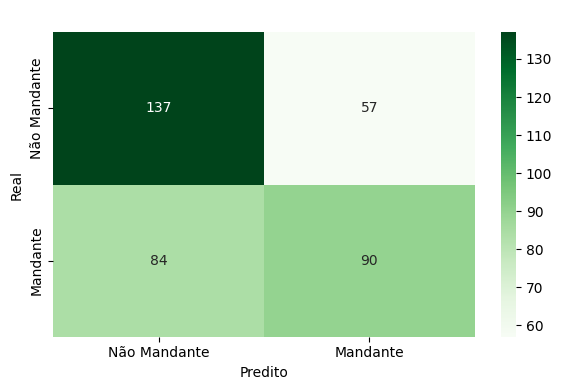


Relat√≥rio de Classifica√ß√£o (Dados a partir de 2022):
              precision    recall  f1-score   support

N√£o Mandante       0.62      0.71      0.66       194
    Mandante       0.61      0.52      0.56       174

    accuracy                           0.62       368
   macro avg       0.62      0.61      0.61       368
weighted avg       0.62      0.62      0.61       368



In [17]:
# prompt: do the background transparent and the text white

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['N√£o Mandante', 'Mandante'],
            yticklabels=['N√£o Mandante', 'Mandante'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confus√£o - KNN com Classes Reduzidas')
# Make text white
plt.rcParams['text.color'] = 'white'
# Make the background transparent
plt.gca().patch.set_alpha(0)
plt.tight_layout()
plt.show()

# Ignora avisos para manter a sa√≠da mais limpa durante o loop
warnings.filterwarnings('ignore', category=UserWarning)

# =======================================================
# ETAPA DE OTIMIZA√á√ÉO: ENCONTRAR O MELHOR ANO DE CORTE
# =======================================================
print("üöÄ Iniciando busca pelo melhor ano de corte (2012-2025)...")

# --- PR√â-REQUISITO ---
# Supondo que 'df' seja seu DataFrame j√° carregado.
# A linha abaixo garante que a coluna de data esteja no formato correto.
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
# ---------------------

# Guarda o DataFrame original para usar no loop
df_original = df.dropna(subset=['Date']).copy()

# Define o intervalo de anos para testar
years_to_test = range(2012, 2026) # de 2012 a 2025
results = {}

for year in years_to_test:
    print(f"\n--- ‚è≥ Testando com dados a partir de {year} ---")

    # 1. Filtra o DataFrame para o ano de corte atual
    df_filtered = df_original[df_original['Date'].dt.year >= year].copy()

    # 2. Verifica se h√° dados suficientes para prosseguir
    if len(df_filtered) < 100 or df_filtered['Res'].nunique() < 3:
        print(f"Dados insuficientes ou classes ausentes para o ano {year}. Pulando.")
        continue

    # 3. Pipeline de Engenharia de Features e Treinamento
    df_filtered['Res_bin'] = df_filtered['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # Features Derivadas
    df_filtered['H_delta_max_avg'] = df_filtered['MaxCH'] - df_filtered['AvgCH']
    df_filtered['H_delta_psc_avg'] = df_filtered['PSCH'] - df_filtered['AvgCH']
    df_filtered['H_spread'] = df_filtered[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
    df_filtered['D_delta_max_avg'] = df_filtered['MaxCD'] - df_filtered['AvgCD']
    df_filtered['D_delta_psc_avg'] = df_filtered['PSCD'] - df_filtered['AvgCD']
    df_filtered['D_spread'] = df_filtered[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
    df_filtered['A_delta_max_avg'] = df_filtered['MaxCA'] - df_filtered['AvgCA']
    df_filtered['A_delta_psc_avg'] = df_filtered['PSCA'] - df_filtered['AvgCA']
    df_filtered['A_spread'] = df_filtered[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

    features = [
        'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
        'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
        'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
    ]

    df_filtered.dropna(subset=features + ['Res_bin'], inplace=True)
    X = df_filtered[features]
    y = df_filtered['Res_bin']

    # Valida√ß√£o adicional de dados
    if len(y.unique()) < 2:
        print(f"Apenas uma classe presente ap√≥s limpeza para o ano {year}. Pulando.")
        continue

    # Divis√£o em Treino e Teste (com estratifica√ß√£o para garantir a propor√ß√£o das classes)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Otimiza√ß√£o do K para o conjunto de dados atual
    k_range = range(3, 21)
    cv_scores = []
    try:
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
            cv_scores.append(scores.mean())

        if not cv_scores: continue
        best_k = k_range[np.argmax(cv_scores)]

        # Treinamento e avalia√ß√£o
        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        results[year] = (accuracy, best_k) # Armazena a acur√°cia e o melhor k
        print(f"‚úÖ Resultado para {year}: Acur√°cia de {accuracy:.4f} (com melhor k={best_k})")

    except ValueError:
        print(f"Erro na valida√ß√£o cruzada para {year} (poucas amostras em alguma classe). Pulando.")
        continue

# =======================================================
# RESULTADO FINAL DA OTIMIZA√á√ÉO
# =======================================================
if not results:
    print("\nNenhum resultado v√°lido foi gerado. Verifique os dados de entrada e o intervalo de anos.")
else:
    # Encontra o melhor ano buscando pela maior acur√°cia (o primeiro item da tupla)
    best_year = max(results, key=lambda year: results[year][0])
    best_accuracy, best_k_final = results[best_year]

    print("\n\n=======================================================")
    print("üèÜ OTIMIZA√á√ÉO CONCLU√çDA üèÜ")
    print(f"Melhor ano de corte encontrado: {best_year}")
    print(f"üéØ Maior acur√°cia alcan√ßada: {best_accuracy:.4f}")
    print(f"üìà Melhor 'k' para este ano: {best_k_final}")
    print("=======================================================")

# Filter data for years from 2022 onwards
df_filtered_2022 = df_original[df_original['Date'].dt.year >= 2023].copy()

if len(df_filtered_2022) < 100 or df_filtered_2022['Res'].nunique() < 3:
    print("Dados insuficientes ou classes ausentes a partir de 2022. N√£o √© poss√≠vel gerar a matriz de confus√£o.")
else:
    # Apply the same feature engineering steps
    df_filtered_2022['Res_bin'] = df_filtered_2022['Res'].map({'H': 1, 'D': 0, 'A': 0})

    df_filtered_2022['H_delta_max_avg'] = df_filtered_2022['MaxCH'] - df_filtered_2022['AvgCH']
    df_filtered_2022['H_delta_psc_avg'] = df_filtered_2022['PSCH'] - df_filtered_2022['AvgCH']
    df_filtered_2022['H_spread'] = df_filtered_2022[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
    df_filtered_2022['D_delta_max_avg'] = df_filtered_2022['MaxCD'] - df_filtered_2022['AvgCD']
    df_filtered_2022['D_delta_psc_avg'] = df_filtered_2022['PSCD'] - df_filtered_2022['AvgCD']
    df_filtered_2022['D_spread'] = df_filtered_2022[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
    df_filtered_2022['A_delta_max_avg'] = df_filtered_2022['MaxCA'] - df_filtered_2022['AvgCA']
    df_filtered_2022['A_delta_psc_avg'] = df_filtered_2022['PSCA'] - df_filtered_2022['AvgCA']
    df_filtered_2022['A_spread'] = df_filtered_2022[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

    features = [
        'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
        'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
        'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
    ]

    df_filtered_2022.dropna(subset=features + ['Res_bin'], inplace=True)
    X_2022 = df_filtered_2022[features]
    y_2022 = df_filtered_2022['Res_bin']

    if len(y_2022.unique()) < 2:
        print("Apenas uma classe presente ap√≥s limpeza para dados a partir de 2022. N√£o √© poss√≠vel gerar a matriz de confus√£o.")
    else:
        # Split data (you can use the same split ratio, but on the filtered data)
        X_train_2022, X_test_2022, y_train_2022, y_test_2022 = train_test_split(
            X_2022, y_2022, test_size=0.4, random_state=42, stratify=y_2022
        )

        # Scale features
        scaler_2022 = StandardScaler()
        X_train_scaled_2022 = scaler_2022.fit_transform(X_train_2022)
        X_test_scaled_2022 = scaler_2022.transform(X_test_2022)

        # Use the best_k found during the optimization for this KNN model
        # (Assuming best_k_final from the previous optimization is the desired k)
        knn_2022 = KNeighborsClassifier(n_neighbors=best_k_final)
        knn_2022.fit(X_train_scaled_2022, y_train_2022)
        y_pred_2022 = knn_2022.predict(X_test_scaled_2022)

        # Generate Confusion Matrix
        cm_2022 = confusion_matrix(y_test_2022, y_pred_2022)

        print("\nMatriz de Confus√£o (Dados a partir de 2022):")
        print(cm_2022)

        # Plot Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm_2022, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['N√£o Mandante', 'Mandante'],
                    yticklabels=['N√£o Mandante', 'Mandante'])
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.title('Matriz de Confus√£o - KNN (Dados a partir de 2022)')
        # Make text white
        plt.rcParams['text.color'] = 'white'
        # Make the background transparent
        plt.gca().patch.set_alpha(0)
        plt.tight_layout()
        plt.show()

        print("\nRelat√≥rio de Classifica√ß√£o (Dados a partir de 2022):")
        print(classification_report(y_test_2022, y_pred_2022, target_names=['N√£o Mandante', 'Mandante']))


Iniciando a an√°lise de Feature Importance para o modelo com dados a partir de 2023 e k=15

Modelo final treinado com sucesso.
Calculando a import√¢ncia das features por permuta√ß√£o...

--- Resultado da An√°lise de Import√¢ncia ---

            feature  importance_mean
1             AvgCH         0.020380
8             MaxCD         0.018478
2             MaxCH         0.016304
0              PSCH         0.014402
10  D_delta_psc_avg         0.014130
7             AvgCD         0.013587
11         D_spread         0.011685
4   H_delta_psc_avg         0.011141
9   D_delta_max_avg         0.009783
16  A_delta_psc_avg         0.008967
6              PSCD         0.007337
5          H_spread         0.004620
17         A_spread         0.003261
13            AvgCA         0.002446
14            MaxCA         0.001630
12             PSCA         0.001630
3   H_delta_max_avg        -0.000272
15  A_delta_max_avg        -0.002174


/tmp/ipython-input-2958282311.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


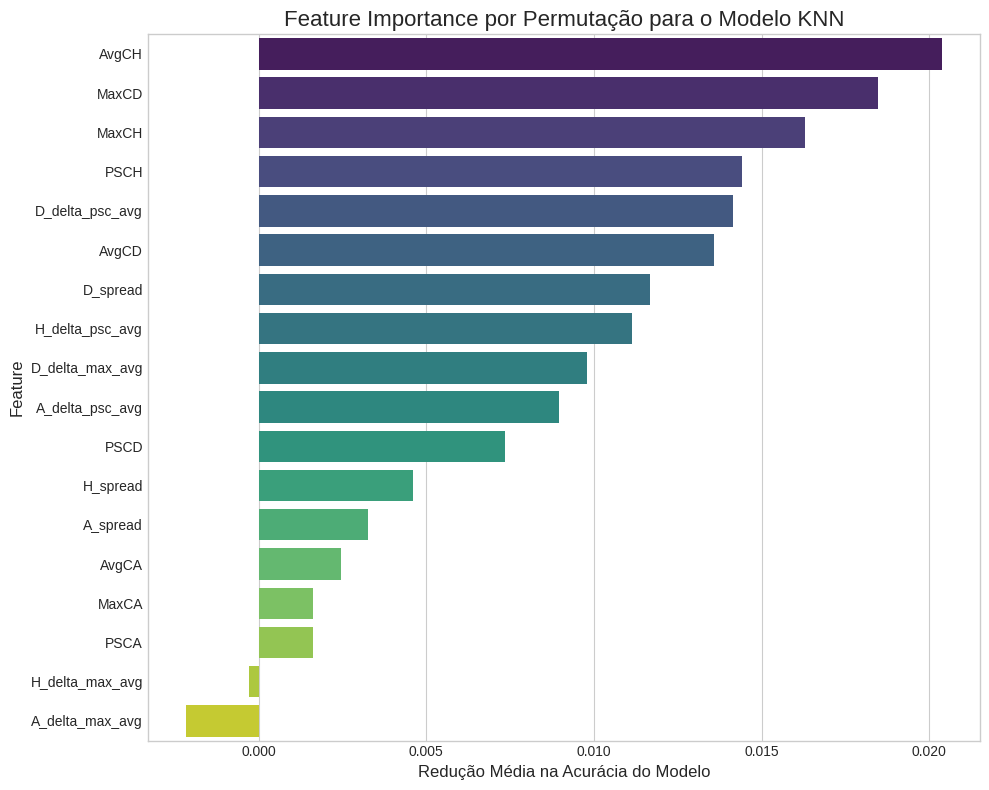

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# --- PR√â-REQUISITOS ---
# 1. O DataFrame 'df' est√° carregado.
# 2. A coluna 'Res_num' j√° existe no 'df'.
# 3. As vari√°veis 'best_year' e 'best_k_final' foram definidas na etapa de otimiza√ß√£o.
#
# Se precisar rodar de forma isolada, defina os valores manualmente:
# best_year = 2018      # Exemplo: substitua pelo seu melhor ano
# best_k_final = 19     # Exemplo: substitua pelo seu melhor k
# ------------------------

print(f"Iniciando a an√°lise de Feature Importance para o modelo com dados a partir de {best_year} e k={best_k_final}")

# ==============================================================
# ETAPA 1: PREPARAR OS DADOS (USANDO OS MELHORES PAR√ÇMETROS)
# ==============================================================

df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df_final = df[df['Date'].dt.year >= best_year].copy()

# **N√ÉO** criamos mais a coluna 'Res_bin'. Usaremos 'Res_num' diretamente.

# Features Derivadas
df_final['H_delta_max_avg'] = df_final['MaxCH'] - df_final['AvgCH']
df_final['H_delta_psc_avg'] = df_final['PSCH'] - df_final['AvgCH']
df_final['H_spread'] = df_final[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
df_final['D_delta_max_avg'] = df_final['MaxCD'] - df_final['AvgCD']
df_final['D_delta_psc_avg'] = df_final['PSCD'] - df_final['AvgCD']
df_final['D_spread'] = df_final[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
df_final['A_delta_max_avg'] = df_final['MaxCA'] - df_final['AvgCA']
df_final['A_delta_psc_avg'] = df_final['PSCA'] - df_final['AvgCA']
df_final['A_spread'] = df_final[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

features = [
    'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
    'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
    'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
]

# MODIFICADO: Usando 'Res_num' para limpar dados nulos e definir X e y
df_final.dropna(subset=features + ['Res_num'], inplace=True)
X = df_final[features]
y = df_final['Res_num']

# Treino / Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Escalonamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================================================
# ETAPA 2: TREINAR O MODELO FINAL
# ==============================================================
knn = KNeighborsClassifier(n_neighbors=best_k_final)
knn.fit(X_train_scaled, y_train)
print("\nModelo final treinado com sucesso.")

# ==============================================================
# ETAPA 3: CALCULAR E PLOTAR A FEATURE IMPORTANCE
# ==============================================================
print("Calculando a import√¢ncia das features por permuta√ß√£o...")

# Calcula a import√¢ncia no conjunto de TESTE para evitar vi√©s
result = permutation_importance(
    knn, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Organiza os resultados em um DataFrame do Pandas
perm_importance = pd.DataFrame(
    {'feature': features, 'importance_mean': result.importances_mean}
)
perm_importance = perm_importance.sort_values('importance_mean', ascending=False)

print("\n--- Resultado da An√°lise de Import√¢ncia ---\n")
print(perm_importance)

# Plotar o gr√°fico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(
    x='importance_mean',
    y='feature',
    data=perm_importance,
    palette='viridis',
    ax=ax
)

ax.set_title('Feature Importance por Permuta√ß√£o para o Modelo KNN', fontsize=16)
ax.set_xlabel('Redu√ß√£o M√©dia na Acur√°cia do Modelo', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np

# ===================================================================
# 1. CARREGAMENTO E PREPARA√á√ÉO INICIAL DO DATASET
# ===================================================================
try:
    df = pd.read_csv('BRA.csv')
    print("‚úÖ Dataset 'BRA.csv' carregado com sucesso.")
except FileNotFoundError:
    print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado. Certifique-se de que ele est√° na mesma pasta que o seu script.")
    exit()

# --- REVIS√ÉO E MELHORIA DAS COLUNAS ---
# Garante que os nomes dos times n√£o tenham espa√ßos extras
df['Home'] = df['Home'].str.strip()
df['Away'] = df['Away'].str.strip()
# Garante que as colunas de gols sejam num√©ricas, tratando erros
df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
df['AG'] = pd.to_numeric(df['AG'], errors='coerce')
# ----------------------------------------

# Calcula as odds m√©dias a partir das colunas de cada casa de aposta
odds_h = [col for col in df.columns if col.endswith('H')]
odds_d = [col for col in df.columns if col.endswith('D')]
odds_a = [col for col in df.columns if col.endswith('A')]
df['AvgCH'] = df[odds_h].mean(axis=1, skipna=True)
df['AvgCD'] = df[odds_d].mean(axis=1, skipna=True)
df['AvgCA'] = df[odds_a].mean(axis=1, skipna=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

# A coluna 'FTR' (Full Time Result) √© usada para criar o alvo num√©rico
df['Res_num'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})
print("‚úÖ Colunas de odds m√©dias e alvo num√©rico criadas.")


# ===================================================================
# 2. ENGENHARIA DE FEATURES
# ===================================================================
print("\nüöÄ Iniciando a engenharia de features avan√ßadas...")

# FEATURE SET 1: PROBABILIDADES IMPL√çCITAS
df['Prob_H'] = 1 / df['AvgCH']
df['Prob_D'] = 1 / df['AvgCD']
df['Prob_A'] = 1 / df['AvgCA']
df['Prob_H_minus_A'] = df['Prob_H'] - df['Prob_A']
print("‚úÖ Features de probabilidade criadas.")

# FEATURE SET 2: FORMA / MOMENTUM (√öLTIMOS 5 JOGOS)
df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

form_features = [
    'H_form_points_L5', 'A_form_points_L5', 'H_form_goals_scored_L5', 'A_form_goals_scored_L5',
    'H_form_goals_conceded_L5', 'A_form_goals_conceded_L5'
]
for feature in form_features:
    df[feature] = np.nan

# Uso de 'HomeTeam' e 'AwayTeam' para identificar os times
all_teams = pd.concat([df['Home'], df['Away']]).unique()
print(f"Calculando a forma (√∫ltimos 5 jogos) para {len(all_teams)} times...")

for team in all_teams:
    team_matches = df[(df['Home'] == team) | (df['Away'] == team)].copy()

    team_points = np.where(team_matches['Home'] == team, team_matches['H_points'], team_matches['A_points'])
    # Uso de 'FTHG' e 'FTAG' para calcular gols marcados/sofridos
    team_goals_scored = np.where(team_matches['Home'] == team, team_matches['HG'], team_matches['AG'])
    team_goals_conceded = np.where(team_matches['Home'] == team, team_matches['AG'], team_matches['HG'])

    form_points_sum = pd.Series(team_points).rolling(window=6, closed='left').sum()
    form_goals_scored_mean = pd.Series(team_goals_scored).rolling(window=6, closed='left').mean()
    form_goals_conceded_mean = pd.Series(team_goals_conceded).rolling(window=6, closed='left').mean()

    team_matches['form_points'] = form_points_sum.values
    team_matches['form_goals_scored'] = form_goals_scored_mean.values
    team_matches['form_goals_conceded'] = form_goals_conceded_mean.values

    home_indices = df[df['Home'] == team].index
    away_indices = df[df['Away'] == team].index

    df.loc[home_indices, 'H_form_points_L5'] = team_matches.loc[home_indices, 'form_points']
    df.loc[home_indices, 'H_form_goals_scored_L5'] = team_matches.loc[home_indices, 'form_goals_scored']
    df.loc[home_indices, 'H_form_goals_conceded_L5'] = team_matches.loc[home_indices, 'form_goals_conceded']

    df.loc[away_indices, 'A_form_points_L5'] = team_matches.loc[away_indices, 'form_points']
    df.loc[away_indices, 'A_form_goals_scored_L5'] = team_matches.loc[away_indices, 'form_goals_scored']
    df.loc[away_indices, 'A_form_goals_conceded_L5'] = team_matches.loc[away_indices, 'form_goals_conceded']

df['form_diff_points'] = df['H_form_points_L5'] - df['A_form_points_L5']
df['form_diff_goals_scored'] = df['H_form_goals_scored_L5'] - df['A_form_goals_scored_L5']
df['form_diff_goals_conceded'] = df['H_form_goals_conceded_L5'] - df['A_form_goals_conceded_L5']
print("‚úÖ Features de forma e diferen√ßa de forma criadas.")

# FEATURE SET 3: M√âDIAS DA TEMPORADA
# --- Uso da coluna 'Season' ---
# Criamos 'Season' a partir do ano para agrupar corretamente as estat√≠sticas anuais.
df['Season'] = df['Date'].dt.year
df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.expanding().mean())
df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.expanding().mean())
df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.expanding().mean())
df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.expanding().mean())
print("‚úÖ Features de m√©dias da temporada criadas.")


# ===================================================================
# 3. MONTAGEM FINAL DO CONJUNTO DE DADOS PARA O MODELO
# ===================================================================
print("\nMontando o DataFrame final para o treinamento...")

final_features = [
    'AvgCH', 'AvgCD', 'AvgCA',
    'Prob_H', 'Prob_D', 'Prob_A', 'Prob_H_minus_A',
    'H_form_points_L5', 'A_form_points_L5', 'form_diff_points',
    'H_form_goals_scored_L5', 'A_form_goals_scored_L5', 'form_diff_goals_scored',
    'H_form_goals_conceded_L5', 'A_form_goals_conceded_L5', 'form_diff_goals_conceded',
    'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
    'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
]

df_model = df.dropna(subset=final_features + ['Res_num'])
X = df_model[final_features]
y = df_model['Res_num']

print("\nüéâ Processo conclu√≠do!")
print(f"Seu conjunto de dados de treino est√° pronto com {X.shape[0]} amostras e {X.shape[1]} features.")
print("\nPrimeiras 5 linhas de X (features):")
print(X.head())

‚úÖ Dataset 'BRA.csv' carregado com sucesso.
‚úÖ Colunas de odds m√©dias e alvo num√©rico criadas.

üöÄ Iniciando a engenharia de features avan√ßadas...
‚úÖ Features de probabilidade criadas.
Calculando a forma (√∫ltimos 5 jogos) para 37 times...
‚úÖ Features de forma e diferen√ßa de forma criadas.
‚úÖ Features de m√©dias da temporada criadas.

Montando o DataFrame final para o treinamento...

üéâ Processo conclu√≠do!
Seu conjunto de dados de treino est√° pronto com 4957 amostras e 20 features.

Primeiras 5 linhas de X (features):
       AvgCH     AvgCD     AvgCA    Prob_H    Prob_D    Prob_A  \
60  2.110000  3.460000  3.770000  0.473934  0.289017  0.265252   
61  3.046667  3.366667  2.516667  0.328228  0.297030  0.397351   
62  1.540000  4.353333  7.093333  0.649351  0.229709  0.140977   
63  2.993333  3.356667  2.493333  0.334076  0.297915  0.401070   
64  1.690000  3.910000  5.386667  0.591716  0.255754  0.185644   

    Prob_H_minus_A  H_form_points_L5  A_form_points_L5  form_dif

‚úÖ Dataset 'BRA.csv' carregado com sucesso.
‚úÖ Engenharia de features conclu√≠da.

 treinando o modelo RandomForest para obter a import√¢ncia das features...
‚úÖ Modelo treinado.

--- Import√¢ncia de Cada Feature (do maior para o menor) ---
                        Feature  Importance
16    season_avg_H_goals_scored    0.115189
19  season_avg_A_goals_conceded    0.089187
18  season_avg_H_goals_conceded    0.084592
17    season_avg_A_goals_scored    0.074991
5                        Prob_A    0.053787
6                Prob_H_minus_A    0.053025
3                        Prob_H    0.050039
1                         AvgCD    0.047292
0                         AvgCH    0.047087
2                         AvgCA    0.046588
4                        Prob_D    0.045620
9              form_diff_points    0.034732
12       form_diff_goals_scored    0.034261
15     form_diff_goals_conceded    0.033613
10       H_form_goals_scored_L5    0.032573
8              A_form_points_L5    0.031928
14     A_

/tmp/ipython-input-1657228402.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


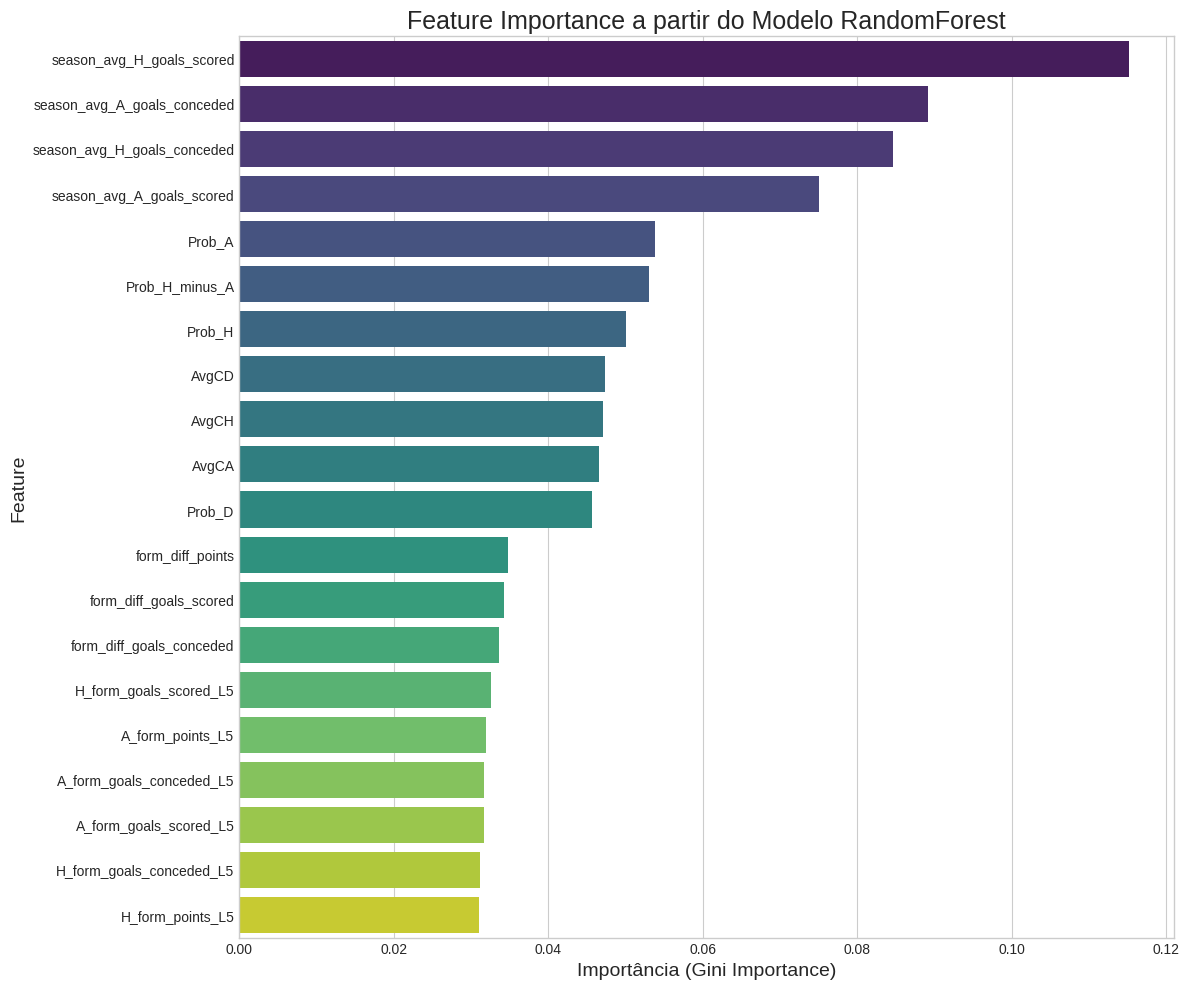

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ===================================================================
# 1. CARREGAMENTO E ENGENHARIA DE FEATURES (C√ìDIGO ANTERIOR)
# ===================================================================
try:
    df = pd.read_csv('BRA.csv')
    print("‚úÖ Dataset 'BRA.csv' carregado com sucesso.")
except FileNotFoundError:
    print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado.")
    exit()

# Prepara√ß√µes iniciais
df['Home'] = df['Home'].str.strip()
df['Away'] = df['Away'].str.strip()
df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

odds_h = [col for col in df.columns if col.endswith('H')]
odds_d = [col for col in df.columns if col.endswith('D')]
odds_a = [col for col in df.columns if col.endswith('A')]
df['AvgCH'] = df[odds_h].mean(axis=1, skipna=True)
df['AvgCD'] = df[odds_d].mean(axis=1, skipna=True)
df['AvgCA'] = df[odds_a].mean(axis=1, skipna=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df['Res_num'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

# Feature Engineering...
df['Prob_H'] = 1 / df['AvgCH']
df['Prob_D'] = 1 / df['AvgCD']
df['Prob_A'] = 1 / df['AvgCA']
df['Prob_H_minus_A'] = df['Prob_H'] - df['Prob_A']

df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)
form_features = ['H_form_points_L5', 'A_form_points_L5', 'H_form_goals_scored_L5', 'A_form_goals_scored_L5', 'H_form_goals_conceded_L5', 'A_form_goals_conceded_L5']
for feature in form_features:
    df[feature] = np.nan
all_teams = pd.concat([df['Home'], df['Away']]).unique()

for team in all_teams:
    team_matches = df[(df['Home'] == team) | (df['Away'] == team)].copy()
    team_points = np.where(team_matches['Home'] == team, team_matches['H_points'], team_matches['A_points'])
    team_goals_scored = np.where(team_matches['Home'] == team, team_matches['HG'], team_matches['AG'])
    team_goals_conceded = np.where(team_matches['Home'] == team, team_matches['AG'], team_matches['HG'])
    form_points_sum = pd.Series(team_points).rolling(window=6, closed='left').sum()
    form_goals_scored_mean = pd.Series(team_goals_scored).rolling(window=6, closed='left').mean()
    form_goals_conceded_mean = pd.Series(team_goals_conceded).rolling(window=6, closed='left').mean()
    team_matches.loc[:, 'form_points'] = form_points_sum.values
    team_matches.loc[:, 'form_goals_scored'] = form_goals_scored_mean.values
    team_matches.loc[:, 'form_goals_conceded'] = form_goals_conceded_mean.values
    home_indices = df[df['Home'] == team].index
    away_indices = df[df['Away'] == team].index
    df.loc[home_indices, 'H_form_points_L5'] = team_matches.loc[home_indices, 'form_points']
    df.loc[home_indices, 'H_form_goals_scored_L5'] = team_matches.loc[home_indices, 'form_goals_scored']
    df.loc[home_indices, 'H_form_goals_conceded_L5'] = team_matches.loc[home_indices, 'form_goals_conceded']
    df.loc[away_indices, 'A_form_points_L5'] = team_matches.loc[away_indices, 'form_points']
    df.loc[away_indices, 'A_form_goals_scored_L5'] = team_matches.loc[away_indices, 'form_goals_scored']
    df.loc[away_indices, 'A_form_goals_conceded_L5'] = team_matches.loc[away_indices, 'form_goals_conceded']

df['form_diff_points'] = df['H_form_points_L5'] - df['A_form_points_L5']
df['form_diff_goals_scored'] = df['H_form_goals_scored_L5'] - df['A_form_goals_scored_L5']
df['form_diff_goals_conceded'] = df['H_form_goals_conceded_L5'] - df['A_form_goals_conceded_L5']

df['Season'] = df['Date'].dt.year
df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.expanding().mean())
df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.expanding().mean())
df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.expanding().mean())
df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.expanding().mean())
print("‚úÖ Engenharia de features conclu√≠da.")

# ===================================================================
# 2. MONTAGEM FINAL E TREINAMENTO DO MODELO
# ===================================================================
final_features = [
    'AvgCH', 'AvgCD', 'AvgCA', 'Prob_H', 'Prob_D', 'Prob_A', 'Prob_H_minus_A',
    'H_form_points_L5', 'A_form_points_L5', 'form_diff_points', 'H_form_goals_scored_L5',
    'A_form_goals_scored_L5', 'form_diff_goals_scored', 'H_form_goals_conceded_L5',
    'A_form_goals_conceded_L5', 'form_diff_goals_conceded', 'season_avg_H_goals_scored',
    'season_avg_A_goals_scored', 'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
]
df_model = df.dropna(subset=final_features + ['Res_num'])
X = df_model[final_features]
y = df_model['Res_num']

# Divis√£o em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Treinamento do Modelo RandomForest
print("\n treinando o modelo RandomForest para obter a import√¢ncia das features...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("‚úÖ Modelo treinado.")

# ===================================================================
# 3. EXTRA√á√ÉO E PLOT DA FEATURE IMPORTANCE
# ===================================================================
# Extrai a import√¢ncia de cada feature
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\n--- Import√¢ncia de Cada Feature (do maior para o menor) ---")
print(importance_df)

# Plot do gr√°fico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance a partir do Modelo RandomForest', fontsize=18)
plt.xlabel('Import√¢ncia (Gini Importance)', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

‚úÖ Dataset 'BRA.csv' carregado com sucesso.
Iniciando a prepara√ß√£o dos dados e engenharia de features...
‚úÖ Engenharia de features conclu√≠da.

Usando dados a partir de 2023.
Dataset final com 3732 amostras e 20 features.

üöÄ Treinando e avaliando modelos...

--- Modelo: Regress√£o Log√≠stica ---
Acur√°cia no Conjunto de Teste: 0.6634
Relat√≥rio de Classifica√ß√£o:
                      precision    recall  f1-score   support

N√£o-Vit√≥ria Mandante       0.67      0.72      0.69       595
    Vit√≥ria Mandante       0.65      0.60      0.63       525

            accuracy                           0.66      1120
           macro avg       0.66      0.66      0.66      1120
        weighted avg       0.66      0.66      0.66      1120


--- Modelo: KNN (k=20) ---
Acur√°cia no Conjunto de Teste: 0.6598
Relat√≥rio de Classifica√ß√£o:
                      precision    recall  f1-score   support

N√£o-Vit√≥ria Mandante       0.66      0.75      0.70       595
    Vit√≥ria Mandante  

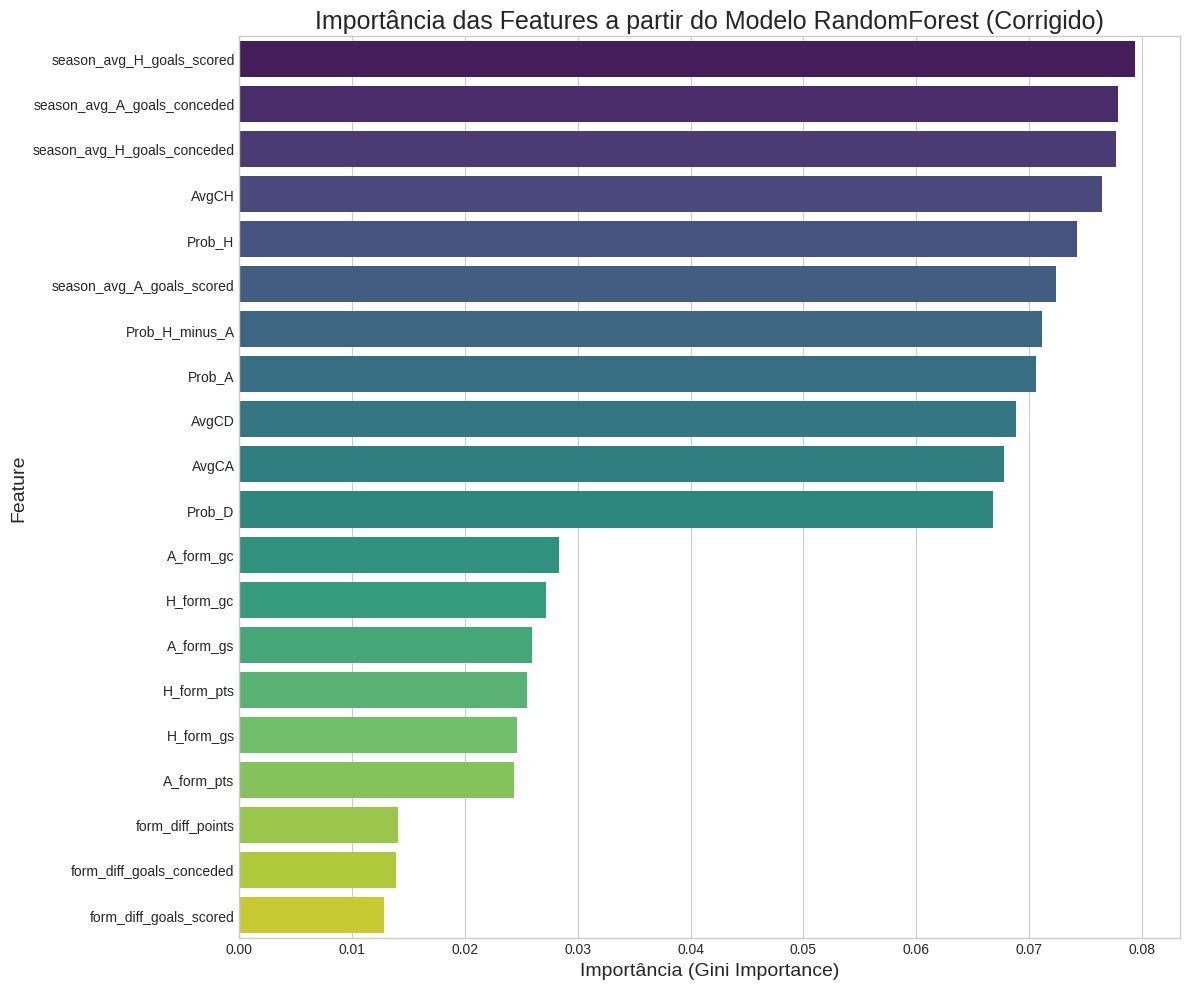

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos para manter a sa√≠da mais limpa
warnings.filterwarnings('ignore')

#==============================================================================
# FUN√á√ÉO DE PREPARA√á√ÉO E ENGENHARIA DE FEATURES
#==============================================================================
def prepare_and_engineer_features(df_raw):
    """
    Recebe o DataFrame bruto e retorna um novo DataFrame com todas as
    features de engenharia e a vari√°vel alvo.
    """
    print("Iniciando a prepara√ß√£o dos dados e engenharia de features...")

    df = df_raw.copy()

    # --- 1. Limpeza e Formata√ß√£o Inicial ---
    df['Home'] = df['Home'].str.strip()
    df['Away'] = df['Away'].str.strip()
    df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
    df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

    # Ordenar por data √© crucial para features baseadas em tempo
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Date', 'HG', 'AG', 'Res'], inplace=True)
    df = df.sort_values('Date')

    # --- 2. Cria√ß√£o da Vari√°vel Alvo ---
    # Alvo: 1 se o mandante venceu (H), 0 caso contr√°rio (D ou A)
    df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # --- 3. Feature Engineering ---

    # A. Odds e Probabilidades
    odds_h = [col for col in df.columns if col.endswith('H')]
    odds_d = [col for col in df.columns if col.endswith('D')]
    odds_a = [col for col in df.columns if col.endswith('A')]
    df['AvgCH'] = df[odds_h].mean(axis=1, skipna=True)
    df['AvgCD'] = df[odds_d].mean(axis=1, skipna=True)
    df['AvgCA'] = df[odds_a].mean(axis=1, skipna=True)

    df['Prob_H'] = 1 / df['AvgCH']
    df['Prob_A'] = 1 / df['AvgCA']
    df['Prob_D'] = 1 / df['AvgCD']
    df['Prob_H_minus_A'] = df['Prob_H'] - df['Prob_A']

    # B. Forma Recente (√öltimos 5 Jogos) - L√≥gica sem vazamento de dados
    # Esta parte est√° correta no seu c√≥digo original usando closed='left'
    df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
    df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

    all_teams = pd.concat([df['Home'], df['Away']]).unique()
    form_data = []

    for team in all_teams:
        team_matches = df[(df['Home'] == team) | (df['Away'] == team)].copy()

        is_home = team_matches['Home'] == team
        points = np.where(is_home, team_matches['H_points'], team_matches['A_points'])
        goals_scored = np.where(is_home, team_matches['HG'], team_matches['AG'])
        goals_conceded = np.where(is_home, team_matches['AG'], team_matches['HG'])

        team_matches['form_pts_L5'] = pd.Series(points, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').sum()
        team_matches['form_gs_L5'] = pd.Series(goals_scored, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').mean()
        team_matches['form_gc_L5'] = pd.Series(goals_conceded, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').mean()

        form_data.append(team_matches)

    df_form = pd.concat(form_data)

    df = df.merge(df_form[['Date', 'Home', 'Away', 'form_pts_L5', 'form_gs_L5', 'form_gc_L5']], on=['Date', 'Home', 'Away'], how='left', suffixes=('', '_H_temp'))
    df = df.merge(df_form[['Date', 'Home', 'Away', 'form_pts_L5', 'form_gs_L5', 'form_gc_L5']], on=['Date', 'Home', 'Away'], how='left', suffixes=('_H', '_A'))

    df.rename(columns={'form_pts_L5_H': 'H_form_pts', 'form_gs_L5_H': 'H_form_gs', 'form_gc_L5_H': 'H_form_gc',
                            'form_pts_L5_A': 'A_form_pts', 'form_gs_L5_A': 'A_form_gs', 'form_gc_L5_A': 'A_form_gc'}, inplace=True)

    # C. M√©dias da Temporada - L√ìGICA CORRIGIDA PARA VAZAMENTO DE DADOS
    df['Season'] = df['Date'].dt.year

    # .shift(1) garante que a m√©dia para a partida N seja calculada com base nos dados das partidas 1 at√© N-1.
    df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).expanding().mean())

    # D. Features de Diferen√ßa
    df['form_diff_points'] = df['H_form_pts'] - df['A_form_pts']
    df['form_diff_goals_scored'] = df['H_form_gs'] - df['A_form_gs']
    df['form_diff_goals_conceded'] = df['H_form_gc'] - df['A_form_gc']

    print("‚úÖ Engenharia de features conclu√≠da.")
    return df

#==============================================================================
# SCRIPT PRINCIPAL DE AN√ÅLISE E TREINAMENTO
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento do Dataset ---
    try:
        df_raw = pd.read_csv('BRA.csv')
        print("‚úÖ Dataset 'BRA.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado. Certifique-se de que est√° na mesma pasta.")
        exit()

    # --- 2. Prepara√ß√£o e Feature Engineering ---
    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 3. Defini√ß√£o do Cen√°rio de An√°lise ---
    # Par√¢metros √≥timos encontrados na sua fase de otimiza√ß√£o
    ANO_DE_CORTE = 2023
    MELHOR_K_PARA_KNN = 20

    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # --- 4. Montagem Final dos Dados para o Modelo ---
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA',
        'Prob_H', 'Prob_D', 'Prob_A', 'Prob_H_minus_A',
        'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored',
        'H_form_gc', 'A_form_gc', 'form_diff_goals_conceded',
        'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]

    # Remover linhas com valores nulos (gerados pelo shift/rolling nos primeiros jogos)
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    print(f"\nUsando dados a partir de {ANO_DE_CORTE}.")
    print(f"Dataset final com {X.shape[0]} amostras e {X.shape[1]} features.")

    # Divis√£o em Treino e Teste (estratificada para manter a propor√ß√£o das classes)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Escalonamento dos dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 5. Treinamento e Avalia√ß√£o dos Modelos ---
    models = {
        "Regress√£o Log√≠stica": LogisticRegression(random_state=42, max_iter=1000),
        f"KNN (k={MELHOR_K_PARA_KNN})": KNeighborsClassifier(n_neighbors=MELHOR_K_PARA_KNN),
        "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
    }

    print("\nüöÄ Treinando e avaliando modelos...")

    for name, model in models.items():
        # Para KNN, usamos dados escalonados. Para modelos de √°rvore, n√£o √© estritamente necess√°rio, mas n√£o prejudica.
        if "KNN" in name or "Regress√£o" in name:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train) # RandomForest n√£o precisa de escalonamento
            y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        print(f"\n--- Modelo: {name} ---")
        print(f"Acur√°cia no Conjunto de Teste: {accuracy:.4f}")
        print("Relat√≥rio de Classifica√ß√£o:")
        print(classification_report(y_test, y_pred, target_names=['N√£o-Vit√≥ria Mandante', 'Vit√≥ria Mandante']))

    # --- 6. An√°lise de Feature Importance do Melhor Modelo (RandomForest) ---
    print("\n--- An√°lise de Import√¢ncia das Features (Modelo RandomForest) ---")

    rf_model = models["Random Forest"] # Pegamos o modelo j√° treinado
    importances = rf_model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print(importance_df)

    # Plot do gr√°fico
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Import√¢ncia das Features a partir do Modelo RandomForest (Corrigido)', fontsize=18)
    plt.xlabel('Import√¢ncia (Gini Importance)', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.tight_layout()
    plt.show()

‚úÖ Dataset 'BRA.csv' carregado com sucesso.
Iniciando a prepara√ß√£o dos dados e engenharia de features...
‚úÖ Engenharia de features conclu√≠da.

Usando dados a partir de 2023.
Dataset final com 888 amostras e 22 features.

üöÄ Treinando e avaliando modelos...

--- Modelo: Regress√£o Log√≠stica ---
Acur√°cia no Conjunto de Teste: 0.5843
Relat√≥rio de Classifica√ß√£o:
                      precision    recall  f1-score   support

N√£o-Vit√≥ria Mandante       0.60      0.66      0.63       143
    Vit√≥ria Mandante       0.56      0.50      0.53       124

            accuracy                           0.58       267
           macro avg       0.58      0.58      0.58       267
        weighted avg       0.58      0.58      0.58       267


--- Modelo: KNN (k=20) ---
Acur√°cia no Conjunto de Teste: 0.5993
Relat√≥rio de Classifica√ß√£o:
                      precision    recall  f1-score   support

N√£o-Vit√≥ria Mandante       0.61      0.70      0.65       143
    Vit√≥ria Mandante   

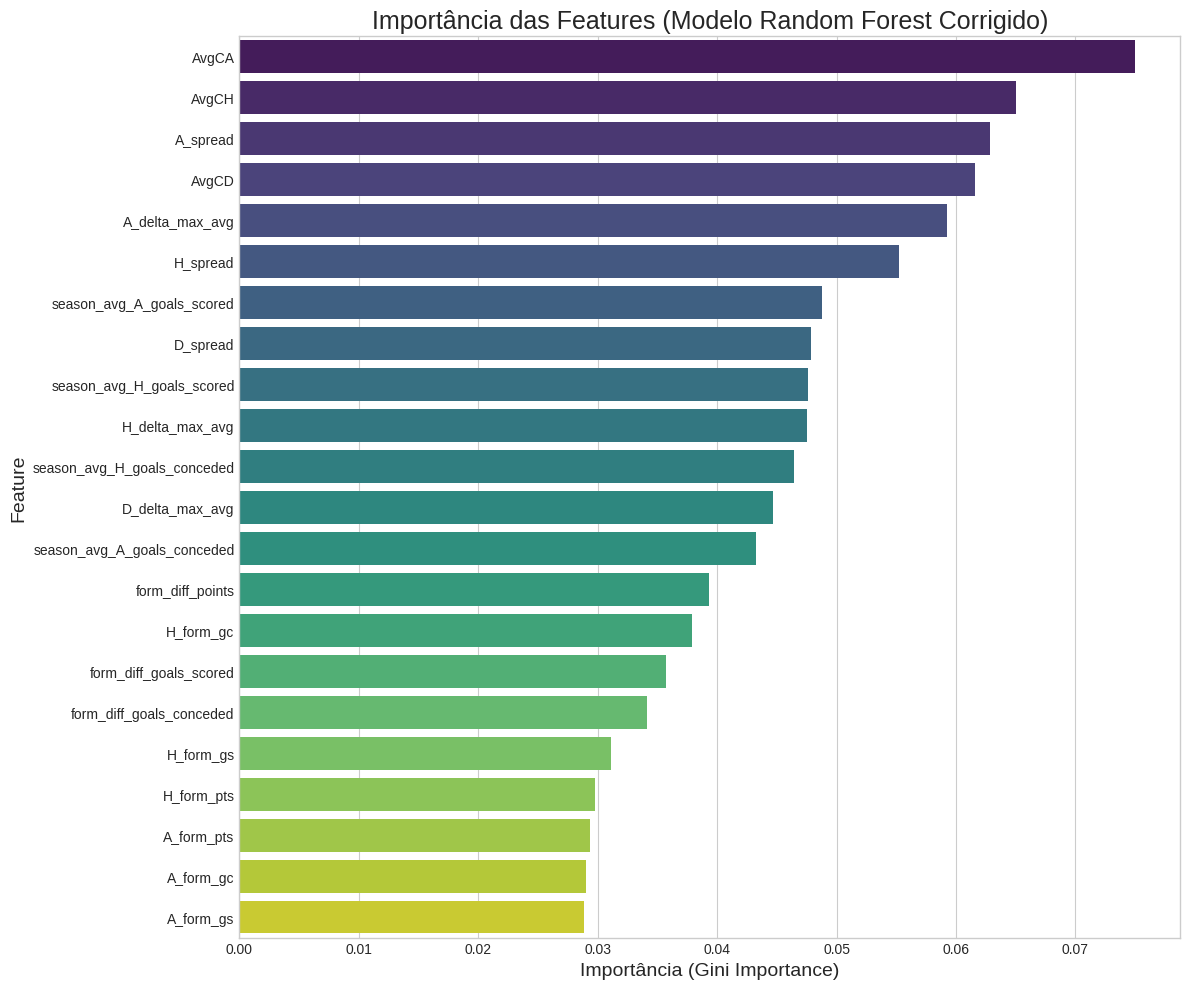

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos para manter a sa√≠da mais limpa
warnings.filterwarnings('ignore')

#==============================================================================
# FUN√á√ÉO DE PREPARA√á√ÉO E ENGENHARIA DE FEATURES (L√ìGICA CORRIGIDA)
#==============================================================================
def prepare_and_engineer_features(df_raw):
    """
    Recebe o DataFrame bruto e retorna um novo DataFrame com todas as
    features de engenharia e a vari√°vel alvo, com a l√≥gica de data leakage corrigida.
    """
    print("Iniciando a prepara√ß√£o dos dados e engenharia de features...")

    df = df_raw.copy()

    # --- 1. Limpeza e Formata√ß√£o Inicial ---
    df['Home'] = df['Home'].str.strip()
    df['Away'] = df['Away'].str.strip()
    df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
    df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Date', 'HG', 'AG', 'Res'], inplace=True)
    df = df.sort_values('Date').reset_index(drop=True)

    # --- 2. Cria√ß√£o da Vari√°vel Alvo ---
    df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # --- 3. Feature Engineering ---

    # A. Odds, Probabilidades, Deltas e Spreads
    odds_h_cols = [col for col in df.columns if col.endswith('H') and col not in ['Home', 'HG']]
    odds_d_cols = [col for col in df.columns if col.endswith('D') and col not in ['AvgCD']]
    odds_a_cols = [col for col in df.columns if col.endswith('A') and col not in ['Away', 'AG']]

    df['AvgCH'] = df[odds_h_cols].mean(axis=1, skipna=True)
    df['AvgCD'] = df[odds_d_cols].mean(axis=1, skipna=True)
    df['AvgCA'] = df[odds_a_cols].mean(axis=1, skipna=True)

    df['MaxCH'] = df[odds_h_cols].max(axis=1, skipna=True)
    df['MaxCD'] = df[odds_d_cols].max(axis=1, skipna=True)
    df['MaxCA'] = df[odds_a_cols].max(axis=1, skipna=True)

    df['H_spread'] = df[odds_h_cols].std(axis=1, skipna=True)
    df['D_spread'] = df[odds_d_cols].std(axis=1, skipna=True)
    df['A_spread'] = df[odds_a_cols].std(axis=1, skipna=True)

    df['H_delta_max_avg'] = df['MaxCH'] - df['AvgCH']
    df['D_delta_max_avg'] = df['MaxCD'] - df['AvgCD']
    df['A_delta_max_avg'] = df['MaxCA'] - df['AvgCA']

    # B. Forma Recente (√öltimos 5 Jogos) - L√≥gica segura
    df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
    df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

    all_teams = pd.concat([df['Home'], df['Away']]).unique()

    # Inicializa as colunas para evitar erros
    form_cols = ['H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs', 'H_form_gc', 'A_form_gc']
    for col in form_cols:
        df[col] = np.nan

    for team in all_teams:
        # Seleciona apenas as linhas relevantes para o time atual, mantendo o √≠ndice original
        team_matches = df[(df['Home'] == team) | (df['Away'] == team)].copy()

        is_home = (team_matches['Home'] == team)
        points = np.where(is_home, team_matches['H_points'], team_matches['A_points'])
        goals_scored = np.where(is_home, team_matches['HG'], team_matches['AG'])
        goals_conceded = np.where(is_home, team_matches['AG'], team_matches['HG'])

        # Calcula as features de forma no DataFrame tempor√°rio
        # 'closed=left' garante que a janela rolante use apenas os jogos passados
        form_pts_L5 = pd.Series(points, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').sum()
        form_gs_L5 = pd.Series(goals_scored, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').mean()
        form_gc_L5 = pd.Series(goals_conceded, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').mean()

        # Atribui de volta ao dataframe principal usando os √≠ndices corretos do team_matches
        df.loc[team_matches[is_home].index, 'H_form_pts'] = form_pts_L5[is_home]
        df.loc[team_matches[is_home].index, 'H_form_gs'] = form_gs_L5[is_home]
        df.loc[team_matches[is_home].index, 'H_form_gc'] = form_gc_L5[is_home]

        df.loc[team_matches[~is_home].index, 'A_form_pts'] = form_pts_L5[~is_home]
        df.loc[team_matches[~is_home].index, 'A_form_gs'] = form_gs_L5[~is_home]
        df.loc[team_matches[~is_home].index, 'A_form_gc'] = form_gc_L5[~is_home]


    # C. M√©dias da Temporada - L√ìGICA CORRIGIDA
    df['Season'] = df['Date'].dt.year
    df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).expanding().mean())

    # D. Features de Diferen√ßa (ap√≥s todos os c√°lculos)
    df['form_diff_points'] = df['H_form_pts'] - df['A_form_pts']
    df['form_diff_goals_scored'] = df['H_form_gs'] - df['A_form_gs']
    df['form_diff_goals_conceded'] = df['H_form_gc'] - df['A_form_gc']

    print("‚úÖ Engenharia de features conclu√≠da.")
    return df

#==============================================================================
# SCRIPT PRINCIPAL DE AN√ÅLISE E TREINAMENTO
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento do Dataset ---
    try:
        df_raw = pd.read_csv('BRA.csv')
        print("‚úÖ Dataset 'BRA.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado.")
        exit()

    # --- 2. Prepara√ß√£o e Feature Engineering ---
    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 3. Defini√ß√£o do Cen√°rio de An√°lise ---
    ANO_DE_CORTE = 2023
    MELHOR_K_PARA_KNN = 20

    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # --- 4. Montagem Final dos Dados para o Modelo ---
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA',
        'H_spread', 'D_spread', 'A_spread',
        'H_delta_max_avg', 'D_delta_max_avg', 'A_delta_max_avg',
        'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored',
        'H_form_gc', 'A_form_gc', 'form_diff_goals_conceded',
        'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]

    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    print(f"\nUsando dados a partir de {ANO_DE_CORTE}.")
    print(f"Dataset final com {X.shape[0]} amostras e {X.shape[1]} features.")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 5. Treinamento e Avalia√ß√£o dos Modelos ---
    models = {
        "Regress√£o Log√≠stica": LogisticRegression(random_state=42, max_iter=1000),
        f"KNN (k={MELHOR_K_PARA_KNN})": KNeighborsClassifier(n_neighbors=MELHOR_K_PARA_KNN),
        "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, class_weight='balanced')
    }

    results = {}
    print("\nüöÄ Treinando e avaliando modelos...")

    for name, model in models.items():
        if "KNN" in name or "Regress√£o" in name:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else: # RandomForest n√£o precisa de escalonamento
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

        print(f"\n--- Modelo: {name} ---")
        print(f"Acur√°cia no Conjunto de Teste: {accuracy:.4f}")
        print("Relat√≥rio de Classifica√ß√£o:")
        print(classification_report(y_test, y_pred, target_names=['N√£o-Vit√≥ria Mandante', 'Vit√≥ria Mandante']))

    # --- 6. An√°lise de Feature Importance do Melhor Modelo ---
    best_model_name = "Random Forest"
    print(f"\n--- An√°lise de Import√¢ncia das Features (Modelo {best_model_name}) ---")

    rf_model = models[best_model_name]
    importances = rf_model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print(importance_df)

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(f'Import√¢ncia das Features (Modelo {best_model_name} Corrigido)', fontsize=18)
    plt.xlabel('Import√¢ncia (Gini Importance)', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.tight_layout()
    plt.show()

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

# (Vou omitir a fun√ß√£o prepare_and_engineer_features aqui para ser breve,
# mas ela deve ser a mesma da resposta anterior)
# >>> INSIRA A FUN√á√ÉO prepare_and_engineer_features(df_raw) AQUI <<<

#==============================================================================
# SCRIPT PRINCIPAL DE OTIMIZA√á√ÉO E AN√ÅLISE
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento e Prepara√ß√£o dos Dados ---
    try:
        df_raw = pd.read_csv('BRA.csv')
    except FileNotFoundError:
        print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado.")
        exit()

    # Usando a mesma fun√ß√£o de antes para garantir consist√™ncia
    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 2. Defini√ß√£o do Cen√°rio de An√°lise ---
    ANO_DE_CORTE = 2023
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # --- 3. Montagem Final dos Dados ---
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread',
        'H_delta_max_avg', 'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts',
        'A_form_pts', 'form_diff_points', 'H_form_gs', 'A_form_gs',
        'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored',
        'season_avg_A_goals_scored', 'season_avg_H_goals_conceded',
        'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)
    X = df_final[final_features]
    y = df_final['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print(f"\nIniciando otimiza√ß√£o com dados a partir de {ANO_DE_CORTE}.")
    print(f"Tamanho do conjunto de treino: {len(X_train)} amostras.")

    # --- 4. Otimiza√ß√£o com GridSearchCV ---
    print("\nüöÄ Otimizando hiperpar√¢metros do RandomForest... (Isso pode levar alguns minutos)")

    # Definindo a grade de par√¢metros que queremos testar
    param_grid = {
        'n_estimators': [100, 150, 200],         # N√∫mero de √°rvores
        'max_depth': [10, 20, None],             # Profundidade m√°xima. None = sem limite
        'min_samples_split': [2, 5, 10],         # M√≠nimo de amostras para dividir um n√≥
        'min_samples_leaf': [1, 2, 4],           # M√≠nimo de amostras em um n√≥ folha
        'class_weight': ['balanced', None]       # Se deve balancear as classes ou n√£o
    }

    # Instanciando o modelo base
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)

    # Configurando o GridSearchCV
    # cv=5 significa valida√ß√£o cruzada com 5 pastas (folds)
    # n_jobs=-1 usa todos os processadores do seu computador para acelerar
    # verbose=2 mostra o progresso da busca
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

    # Executando a busca (a parte demorada)
    grid_search.fit(X_train, y_train)

    # --- 5. An√°lise dos Resultados da Otimiza√ß√£o ---
    print("\nüèÜ Otimiza√ß√£o Conclu√≠da!")
    print("Melhores par√¢metros encontrados:")
    print(grid_search.best_params_)
    print(f"\nMelhor acur√°cia durante a valida√ß√£o cruzada: {grid_search.best_score_:.4f}")

    # --- 6. Avalia√ß√£o Final com o Modelo Otimizado ---
    print("\n--- Avalia√ß√£o Final no Conjunto de Teste com o Melhor Modelo ---")

    # O GridSearchCV j√° retreina o melhor modelo com todos os dados de treino
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    final_accuracy = accuracy_score(y_test, y_pred)

    print(f"Acur√°cia final no Conjunto de Teste: {final_accuracy:.4f}")
    print("Relat√≥rio de Classifica√ß√£o Final:")
    print(classification_report(y_test, y_pred, target_names=['N√£o-Vit√≥ria Mandante', 'Vit√≥ria Mandante']))

Iniciando a prepara√ß√£o dos dados e engenharia de features...
‚úÖ Engenharia de features conclu√≠da.

Iniciando otimiza√ß√£o com dados a partir de 2023.
Tamanho do conjunto de treino: 621 amostras.

üöÄ Otimizando hiperpar√¢metros do RandomForest... (Isso pode levar alguns minutos)
Fitting 5 folds for each of 162 candidates, totalling 810 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos
warnings.filterwarnings('ignore')

# >>> INSIRA A FUN√á√ÉO `prepare_and_engineer_features(df_raw)` DA RESPOSTA ANTERIOR AQUI <<<
# √â crucial que seja a mesma fun√ß√£o, com a l√≥gica de feature engineering corrigida.

#==============================================================================
# SCRIPT PRINCIPAL DE BACKTESTING
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento e Prepara√ß√£o dos Dados ---
    try:
        df_raw = pd.read_csv('BRA.csv')
    except FileNotFoundError:
        print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado.")
        exit()

    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 2. Defini√ß√£o do Cen√°rio e Features ---
    ANO_DE_CORTE = 2023
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread',
        'H_delta_max_avg', 'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts',
        'A_form_pts', 'form_diff_points', 'H_form_gs', 'A_form_gs',
        'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored',
        'season_avg_A_goals_scored', 'season_avg_H_goals_conceded',
        'season_avg_A_goals_conceded'
    ]

    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    # --- 3. Divis√£o CRONOL√ìGICA para Backtesting ---
    # Para um backtest realista, treinamos com dados mais antigos e testamos nos mais novos.

    test_size = 0.3 # Usaremos 30% dos dados mais recentes para a simula√ß√£o
    split_index = int(len(df_final) * (1 - test_size))

    df_train = df_final.iloc[:split_index]
    df_test = df_final.iloc[split_index:]

    X_train = df_train[final_features]
    y_train = df_train['Target']
    X_test = df_test[final_features]
    y_test = df_test['Target']

    print(f"\nIniciando backtesting com dados a partir de {ANO_DE_CORTE}.")
    print(f"Dados de Treino: {len(X_train)} jogos | Dados de Teste/Simula√ß√£o: {len(X_test)} jogos.")

    # --- 4. Treinamento do Modelo Otimizado ---
    # Usando os melhores par√¢metros que o GridSearchCV encontrou
    optimised_params = {
        'class_weight': 'balanced',
        'max_depth': 10,
        'min_samples_leaf': 2,
        'min_samples_split': 2,
        'n_estimators': 150,
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**optimised_params)
    model.fit(X_train, y_train)

    # --- 5. Passo Final: Backtesting da Estrat√©gia de Aposta de Valor ---
    print("\nüöÄ Realizando a simula√ß√£o de apostas de valor...")

    # A. Obter as probabilidades do modelo para o conjunto de teste
    # model.predict_proba retorna [prob_classe_0, prob_classe_1] para cada jogo
    # Classe 1 = Vit√≥ria Mandante, Classe 0 = N√£o-Vit√≥ria Mandante
    pred_probs = model.predict_proba(X_test)[:, 1]

    # B. Criar um dataframe para a simula√ß√£o
    df_backtest = df_test.copy()
    df_backtest['prob_modelo'] = pred_probs

    # C. Definir par√¢metros da estrat√©gia
    STAKE_UNITARIA = 10 # Valor de cada aposta (ex: 10 unidades)
    MIN_VALOR_PERCEBIDO = 0.05 # Exigir um "valor" ou "edge" m√≠nimo de 5% para apostar

    # D. L√≥gica da Simula√ß√£o
    saldo = 0
    historico_saldo = [saldo]
    total_apostado = 0
    apostas_feitas = 0
    apostas_vencidas = 0

    # Iterar sobre cada jogo no conjunto de teste
    for index, row in df_backtest.iterrows():
        prob_modelo = row['prob_modelo']
        odd_mandante = row['AvgCH'] # Usando a odd m√©dia do mandante
        resultado_real = row['Target']

        # Calcular o valor percebido
        valor_calculado = (prob_modelo * odd_mandante) - 1

        # Condi√ß√£o para apostar
        if valor_calculado > MIN_VALOR_PERCEBIDO:
            apostas_feitas += 1
            total_apostado += STAKE_UNITARIA

            if resultado_real == 1: # Aposta venceu
                saldo += (odd_mandante * STAKE_UNITARIA) - STAKE_UNITARIA
                apostas_vencidas += 1
            else: # Aposta perdida
                saldo -= STAKE_UNITARIA

            historico_saldo.append(saldo)

    # --- 6. Relat√≥rio Final do Backtest ---
    print("\n‚úÖ Simula√ß√£o Conclu√≠da!")
    print("--- Relat√≥rio do Backtest da Estrat√©gia ---")

    if apostas_feitas > 0:
        taxa_acerto = (apostas_vencidas / apostas_feitas) * 100
        roi = (saldo / total_apostado) * 100

        print(f"Total de Oportunidades de Valor Encontradas: {apostas_feitas}")
        print(f"Total de Unidades Apostadas: {total_apostado:.2f}")
        print(f"Taxa de Acerto das Apostas de Valor: {taxa_acerto:.2f}%")
        print(f"Lucro/Preju√≠zo L√≠quido: {saldo:.2f} unidades")
        print(f"Retorno Sobre o Investimento (ROI): {roi:.2f}%")
    else:
        print("Nenhuma oportunidade de aposta de valor foi encontrada com os crit√©rios definidos.")

    # --- 7. Visualiza√ß√£o do Saldo ---
    if apostas_feitas > 0:
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.figure(figsize=(12, 6))
        plt.plot(historico_saldo, marker='o', linestyle='-', color='g')
        plt.title('Evolu√ß√£o do Saldo ao Longo das Apostas', fontsize=16)
        plt.xlabel('N√∫mero da Aposta')
        plt.ylabel('Saldo (em unidades)')
        plt.axhline(0, color='r', linestyle='--', label='Ponto de Equil√≠brio')
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
# prompt: plot the last graphic, with the background transparent and  text in white

plt.figure(figsize=(12, 6), facecolor='none') # Set facecolor to 'none' for transparency
plt.plot(historico_saldo, marker='o', linestyle='-', color='green') # Set color to 'white'
plt.title('Evolu√ß√£o do Saldo ao Longo das Apostas', fontsize=16, color='white') # Set color to 'white'
plt.xlabel('N√∫mero da Aposta', color='white') # Set color to 'white'
plt.ylabel('Saldo (em unidades)', color='white') # Set color to 'white'
plt.axhline(0, color='r', linestyle='--', label='Ponto de Equil√≠brio')
plt.legend()
plt.grid(True, color='gray', linestyle='-', linewidth=0.5) # Adjust grid color if needed

# Optional: Make tick labels and spines white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')


plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos
warnings.filterwarnings('ignore')

# >>> INSIRA A FUN√á√ÉO `prepare_and_engineer_features(df_raw)` DA RESPOSTA ANTERIOR AQUI <<<

#==============================================================================
# SCRIPT PRINCIPAL DE OTIMIZA√á√ÉO DE LIMIAR
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento e Prepara√ß√£o dos Dados ---
    try:
        df_raw = pd.read_csv('BRA.csv')
    except FileNotFoundError:
        print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado.")
        exit()

    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 2. Defini√ß√£o do Cen√°rio e Features ---
    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # (A lista de final_features e a limpeza de NaNs v√™m aqui)
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread',
        'H_delta_max_avg', 'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts',
        'A_form_pts', 'form_diff_points', 'H_form_gs', 'A_form_gs',
        'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored',
        'season_avg_A_goals_scored', 'season_avg_H_goals_conceded',
        'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    # --- 3. Divis√£o Cronol√≥gica e Treinamento do Modelo ---
    test_size = 0.3
    split_index = int(len(df_final) * (1 - test_size))
    df_train, df_test = df_final.iloc[:split_index], df_final.iloc[split_index:]

    X_train, y_train = df_train[final_features], df_train['Target']
    X_test, y_test = df_test[final_features], df_test['Target']

    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)
    model.fit(X_train, y_train)

    # --- 4. Prepara√ß√£o para o Loop de Backtesting ---
    pred_probs = model.predict_proba(X_test)[:, 1]
    df_backtest = df_test.copy()
    df_backtest['prob_modelo'] = pred_probs

    # --- 5. Otimiza√ß√£o do Limiar de Valor ---
    print("\nüöÄ Otimizando o limiar para m√°ximo ROI...")

    # Definindo a faixa de limiares para testar (de 1% a 30%)
    limiares = np.arange(0.01, 0.31, 0.01)
    resultados_backtest = []
    STAKE_UNITARIA = 10

    for limiar in limiares:
        saldo = 0
        total_apostado = 0
        apostas_feitas = 0

        for index, row in df_backtest.iterrows():
            prob_modelo = row['prob_modelo']
            odd_mandante = row['AvgCH']
            resultado_real = row['Target']

            valor_calculado = (prob_modelo * odd_mandante) - 1

            if valor_calculado > limiar:
                apostas_feitas += 1
                total_apostado += STAKE_UNITARIA

                if resultado_real == 1:
                    saldo += (odd_mandante * STAKE_UNITARIA) - STAKE_UNITARIA
                else:
                    saldo -= STAKE_UNITARIA

        # Calcular ROI e guardar resultados
        if total_apostado > 0:
            roi = (saldo / total_apostado) * 100
            resultados_backtest.append({'limiar': limiar, 'roi': roi, 'n_apostas': apostas_feitas, 'lucro': saldo})
        else:
            resultados_backtest.append({'limiar': limiar, 'roi': 0, 'n_apostas': 0, 'lucro': 0})

    # --- 6. An√°lise dos Resultados da Otimiza√ß√£o ---
    df_resultados = pd.DataFrame(resultados_backtest)

    if df_resultados.empty or df_resultados['n_apostas'].sum() == 0:
        print("Nenhuma oportunidade de aposta foi encontrada em nenhum dos limiares testados.")
    else:
        # Encontrar o melhor resultado
        melhor_resultado = df_resultados.loc[df_resultados['roi'].idxmax()]

        print("\nüèÜ Otimiza√ß√£o Conclu√≠da!")
        print("--- Melhor Estrat√©gia Encontrada ---")
        print(f"Melhor Limiar de Valor: {melhor_resultado['limiar']:.2f} (ou {melhor_resultado['limiar']*100:.0f}%)")
        print(f"ROI M√°ximo Atingido: {melhor_resultado['roi']:.2f}%")
        print(f"N√∫mero de Apostas com este Limiar: {int(melhor_resultado['n_apostas'])}")
        print(f"Lucro L√≠quido com este Limiar: {melhor_resultado['lucro']:.2f} unidades")

        # --- 7. Plot do Gr√°fico de ROI vs. Limiar ---
        fig, ax1 = plt.subplots(figsize=(14, 7))

        # Plot do ROI
        color = 'tab:green'
        ax1.set_xlabel('Limiar de Valor M√≠nimo para Apostar', fontsize=14)
        ax1.set_ylabel('ROI (%)', color=color, fontsize=14)
        ax1.plot(df_resultados['limiar'], df_resultados['roi'], color=color, marker='o', label='ROI')
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.axhline(0, color='gray', linestyle='--')

        # Anotar o ponto de ROI m√°ximo
        ax1.annotate(f'ROI M√°ximo: {melhor_resultado["roi"]:.2f}%',
                     xy=(melhor_resultado['limiar'], melhor_resultado['roi']),
                     xytext=(melhor_resultado['limiar'], melhor_resultado['roi'] + 5),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     ha='center')

        # Criar um segundo eixo Y para o n√∫mero de apostas
        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('N√∫mero de Apostas Feitas', color=color, fontsize=14)
        ax2.plot(df_resultados['limiar'], df_resultados['n_apostas'], color=color, marker='x', linestyle='--', label='N¬∫ de Apostas')
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()
        plt.title('Otimiza√ß√£o do Limiar de Valor vs. ROI e Volume de Apostas', fontsize=18)
        plt.grid(True)
        plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# >>> INSIRA A FUN√á√ÉO `prepare_and_engineer_features(df_raw)` DA RESPOSTA ANTERIOR AQUI <<<

#==============================================================================
# SCRIPT PRINCIPAL
#==============================================================================
if __name__ == '__main__':

    # --- 1. Prepara√ß√£o dos Dados e Treinamento do Modelo (como antes) ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2023
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # (A lista de final_features e a limpeza de NaNs v√™m aqui)
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread', 'H_delta_max_avg',
        'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Usando os par√¢metros otimizados
    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)
    model.fit(X_train, y_train)

    print("\n‚úÖ Modelo treinado. Iniciando an√°lise de confian√ßa...")

    # --- 2. Gera√ß√£o de Previs√µes e Probabilidades ---
    y_pred = model.predict(X_test)
    pred_probs = model.predict_proba(X_test)

    # Criar um dataframe de resultados para facilitar a an√°lise
    df_analise = pd.DataFrame({
        'resultado_real': y_test,
        'previsao': y_pred,
        'prob_nao_mandante': pred_probs[:, 0], # Probabilidade da classe 0
        'prob_mandante': pred_probs[:, 1]     # Probabilidade da classe 1
    })

    # A confian√ßa da previs√£o √© a probabilidade da classe que foi prevista
    df_analise['confianca'] = np.max(pred_probs, axis=1)
    df_analise['acertou'] = (df_analise['previsao'] == df_analise['resultado_real'])

    # --- 3. An√°lise da Acur√°cia por Limiar de Confian√ßa ---
    print("\nüöÄ Analisando acur√°cia em diferentes n√≠veis de confian√ßa...")

    limiares = np.arange(0.5, 0.81, 0.05) # Testar limiares de 50% a 80%
    resultados_confianca = []

    for limiar in limiares:
        # Filtrar apenas as previs√µes onde a confian√ßa do modelo √© >= ao limiar
        subset_confianca = df_analise[df_analise['confianca'] >= limiar]

        if len(subset_confianca) > 0:
            acuracia_subset = accuracy_score(subset_confianca['resultado_real'], subset_confianca['previsao'])
            resultados_confianca.append({
                'limiar_confianca': limiar,
                'acuracia_no_subset': acuracia_subset,
                'n_jogos': len(subset_confianca),
                'percentual_jogos': len(subset_confianca) / len(df_analise)
            })

    df_resultados = pd.DataFrame(resultados_confianca)

    # --- 4. Relat√≥rio e Visualiza√ß√£o ---
    print("\n--- Desempenho do Modelo por Limiar de Confian√ßa ---")
    print(df_resultados)

    # Plot do gr√°fico de Acur√°cia vs. Limiar
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:green'
    ax1.set_xlabel('Limiar de Confian√ßa M√≠nimo', fontsize=14)
    ax1.set_ylabel('Acur√°cia no Subset', color=color, fontsize=14)
    ax1.plot(df_resultados['limiar_confianca'], df_resultados['acuracia_no_subset'], color=color, marker='o', linestyle='-', label='Acur√°cia')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(bottom=0.5) # Come√ßar o eixo Y em 50% para melhor visualiza√ß√£o

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Percentual de Jogos Analisados', color=color, fontsize=14)
    ax2.plot(df_resultados['limiar_confianca'], df_resultados['percentual_jogos'], color=color, marker='x', linestyle='--', label='% de Jogos')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Acur√°cia vs. Confian√ßa do Modelo (Trade-off)', fontsize=18)
    fig.tight_layout()
    plt.grid(True)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# >>> INSIRA A FUN√á√ÉO `prepare_and_engineer_features(df_raw)` AQUI <<<

#==============================================================================
# SCRIPT DE BACKTESTING COM FILTRO DE CONFIAN√áA
#==============================================================================
if __name__ == '__main__':

    # --- 1. Prepara√ß√£o e Treinamento do Modelo (como antes) ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # (Setup de features, X, y, e split cronol√≥gico como antes)
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread', 'H_delta_max_avg',
        'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    test_size = 0.3
    split_index = int(len(df_final) * (1 - test_size))
    df_train, df_test = df_final.iloc[:split_index], df_final.iloc[split_index:]

    X_train, y_train = df_train[final_features], df_train['Target']
    X_test, y_test = df_test[final_features], df_test['Target']

    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)
    model.fit(X_train, y_train)

    # --- 2. Gera√ß√£o de Probabilidades e DataFrame de An√°lise ---
    pred_probs = model.predict_proba(X_test)

    df_backtest = df_test.copy()
    df_backtest['prob_mandante'] = pred_probs[:, 1] # Probabilidade da vit√≥ria do mandante
    df_backtest['prob_nao_mandante'] = pred_probs[:, 0] # Probabilidade de n√£o vit√≥ria

    # --- 3. Backtesting com a ESTRAT√âGIA COMBINADA ---
    print("\nüöÄ Realizando backtesting com a estrat√©gia combinada...")

    # Definindo os par√¢metros da nossa estrat√©gia final
    LIMIAR_DE_CONFIANCA = 0.65
    LIMIAR_DE_VALOR = 0.05 # Vamos manter 5% por enquanto
    STAKE_UNITARIA = 10

    # Primeiro, filtramos os jogos onde o modelo est√° confiante
    # Vamos focar em apostar a favor do mandante quando a confian√ßa √© alta
    df_filtrado = df_backtest[df_backtest['prob_mandante'] >= LIMIAR_DE_CONFIANCA].copy()
    print(f"Total de jogos onde a confian√ßa na vit√≥ria do mandante foi >= {LIMIAR_DE_CONFIANCA*100}%: {len(df_filtrado)}")

    # Agora, aplicamos a l√≥gica de valor apenas nesse subconjunto
    saldo = 0
    total_apostado = 0
    apostas_feitas = 0
    apostas_vencidas = 0

    for index, row in df_filtrado.iterrows():
        prob_modelo = row['prob_mandante']
        odd_aposta = row['AvgCH']
        resultado_real = row['Target']

        valor_calculado = (prob_modelo * odd_aposta) - 1

        if valor_calculado > LIMIAR_DE_VALOR:
            apostas_feitas += 1
            total_apostado += STAKE_UNITARIA

            if resultado_real == 1:
                saldo += (odd_aposta * STAKE_UNITARIA) - STAKE_UNITARIA
                apostas_vencidas += 1
            else:
                saldo -= STAKE_UNITARIA

    # --- 4. Relat√≥rio Final do Backtest Combinado ---
    print("\n‚úÖ Simula√ß√£o Conclu√≠da!")
    print(f"--- Relat√≥rio do Backtest para Confian√ßa >= {LIMIAR_DE_CONFIANCA*100}% e Valor > {LIMIAR_DE_VALOR*100}% ---")

    if apostas_feitas > 0:
        taxa_acerto = (apostas_vencidas / apostas_feitas) * 100
        roi = (saldo / total_apostado) * 100

        print(f"Total de Oportunidades Encontradas: {apostas_feitas}")
        print(f"Total de Unidades Apostadas: {total_apostado:.2f}")
        print(f"Taxa de Acerto nestas apostas: {taxa_acerto:.2f}%")
        print(f"Lucro/Preju√≠zo L√≠quido: {saldo:.2f} unidades")
        print(f"ROI Final: {roi:.2f}%")
    else:
        print("Nenhuma aposta atendeu aos crit√©rios combinados de valor e confian√ßa.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings

# Ignorar avisos
warnings.filterwarnings('ignore')

# >>> INSIRA A FUN√á√ÉO `prepare_and_engineer_features(df_raw)` DA RESPOSTA ANTERIOR AQUI <<<

#==============================================================================
# SCRIPT PRINCIPAL DE VALIDA√á√ÉO CRONOL√ìGICA (WALK-FORWARD)
#==============================================================================
if __name__ == '__main__':

    # --- 1. Prepara√ß√£o dos Dados ---
    try:
        df_raw = pd.read_csv('BRA.csv')
        print("‚úÖ Dataset 'BRA.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado.")
        exit()

    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 2. Defini√ß√£o do Cen√°rio e Features ---
    # Usando o ano de corte que voc√™ encontrou o resultado promissor
    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # (A lista de final_features e a limpeza de NaNs v√™m aqui)
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread', 'H_delta_max_avg',
        'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    print(f"\nIniciando valida√ß√£o cronol√≥gica com dados a partir de {ANO_DE_CORTE}.")
    print(f"Total de jogos a serem usados na valida√ß√£o: {len(X)}")

    # --- 3. Configura√ß√£o da Valida√ß√£o Cruzada Cronol√≥gica ---
    N_SPLITS = 5 # Vamos dividir os dados em 5 folds sequenciais no tempo
    tscv = TimeSeriesSplit(n_splits=N_SPLITS)

    # Par√¢metros do modelo otimizado e da estrat√©gia a ser testada
    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)

    # Vamos usar o limiar de valor que voc√™ encontrou
    LIMIAR_DE_VALOR_OTIMO = 0.17
    STAKE_UNITARIA = 10

    resultados_folds = []

    print(f"\nüöÄ Realizando {N_SPLITS} simula√ß√µes de backtesting sequenciais...")

    fold_n = 1
    for train_index, test_index in tscv.split(X):
        print(f"\n--- FOLD {fold_n}/{N_SPLITS} ---")

        # A. Divis√£o cronol√≥gica dos dados para este fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        print(f"Treinando com {len(X_train)} jogos, testando com {len(X_test)} jogos.")

        # B. Treinamento do modelo com os dados de treino do fold atual
        model.fit(X_train, y_train)

        # C. Backtesting no conjunto de teste do fold atual
        pred_probs = model.predict_proba(X_test)[:, 1]

        df_backtest_fold = df_final.iloc[test_index].copy()
        df_backtest_fold['prob_modelo'] = pred_probs

        saldo = 0
        total_apostado = 0
        apostas_feitas = 0

        for index, row in df_backtest_fold.iterrows():
            if row['Target'] == 1: # Aposta apenas na vit√≥ria do mandante
                prob_modelo = row['prob_modelo']
                odd_aposta = row['AvgCH']
                resultado_real = row['Target']

                valor_calculado = (prob_modelo * odd_aposta) - 1

                if valor_calculado > LIMIAR_DE_VALOR_OTIMO:
                    apostas_feitas += 1
                    total_apostado += STAKE_UNITARIA

                    if resultado_real == 1:
                        saldo += (odd_aposta * STAKE_UNITARIA) - STAKE_UNITARIA
                    else:
                        saldo -= STAKE_UNITARIA

        # D. Armazenar resultados do fold
        if total_apostado > 0:
            roi = (saldo / total_apostado) * 100
            print(f"Resultado do Fold: {apostas_feitas} apostas, Lucro/Preju√≠zo de {saldo:.2f}, ROI de {roi:.2f}%")
            resultados_folds.append({'fold': fold_n, 'roi': roi, 'n_apostas': apostas_feitas, 'lucro': saldo})
        else:
            print("Resultado do Fold: Nenhuma aposta atendeu ao crit√©rio.")
            resultados_folds.append({'fold': fold_n, 'roi': 0, 'n_apostas': 0, 'lucro': 0})

        fold_n += 1

    # --- 4. Relat√≥rio Final da Valida√ß√£o ---
    print("\n\n‚úÖ Valida√ß√£o Cruzada Cronol√≥gica Conclu√≠da!")
    print("--- Veredito Final da Estrat√©gia ---")

    df_resultados_folds = pd.DataFrame(resultados_folds)

    if df_resultados_folds['n_apostas'].sum() == 0:
        print("A estrat√©gia n√£o realizou nenhuma aposta em nenhum dos folds.")
    else:
        media_roi = df_resultados_folds['roi'].mean()
        std_roi = df_resultados_folds['roi'].std()

        print(df_resultados_folds.to_string(index=False))

        print(f"\nROI M√©dio atrav√©s dos {N_SPLITS} folds: {media_roi:.2f}%")
        print(f"Desvio Padr√£o do ROI (Volatilidade): {std_roi:.2f}%")

        if media_roi > 0:
            print("\nVEREDITO: ‚úÖ Promissor. A estrat√©gia demonstrou ser lucrativa de forma consistente em diferentes per√≠odos de tempo.")
            print("A confian√ßa no resultado de ROI positivo √© agora muito maior.")
        else:
            print("\nVEREDITO: ‚ùå N√£o Robusto. A estrat√©gia n√£o se mostrou consistentemente lucrativa.")
            print("O resultado de 17% de ROI em um √∫nico teste foi provavelmente um acaso estat√≠stico (overfitting ao backtest).")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# >>> INSIRA A FUN√á√ÉO `prepare_and_engineer_features(df_raw)` DAS RESPOSTAS ANTERIORES AQUI <<<
# √â crucial que seja a mesma fun√ß√£o, com a l√≥gica de feature engineering corrigida.

def run_backtest_optimization(df_full, ano_de_corte, features, model_params):
    """
    Roda uma otimiza√ß√£o 2D de limiares para um ano de corte espec√≠fico e plota um mapa de calor.
    """
    print(f"\n{'='*60}")
    print(f"üöÄ INICIANDO AN√ÅLISE COMPLETA PARA ANO DE CORTE: {ano_de_corte}")
    print(f"{'='*60}")

    # --- 1. Prepara√ß√£o dos Dados para o Ano Espec√≠fico ---
    df_final = df_full[df_full['Date'].dt.year >= ano_de_corte].copy()
    df_final.dropna(subset=features + ['Target'], inplace=True)

    if len(df_final) < 200: # M√≠nimo de dados para uma an√°lise confi√°vel
        print(f"Dados insuficientes para o ano de corte {ano_de_corte}. Pulando.")
        return -999, None

    # --- 2. Divis√£o Cronol√≥gica e Treinamento do Modelo ---
    X = df_final[features]
    y = df_final['Target']

    test_size = 0.3
    split_index = int(len(X) * (1 - test_size))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    model = RandomForestClassifier(**model_params)
    model.fit(X_train, y_train)

    # --- 3. Gera√ß√£o de Probabilidades e DataFrame de Backtest ---
    pred_probs = model.predict_proba(X_test)[:, 1]
    df_backtest = df_final.iloc[split_index:].copy()
    df_backtest['prob_modelo'] = pred_probs

    # --- 4. Otimiza√ß√£o 2D dos Limiares ---
    limiares_valor = np.arange(0.05, 0.31, 0.05) # de 5% a 30%
    limiares_confianca = np.arange(0.55, 0.76, 0.05) # de 55% a 75%

    resultados = []
    STAKE = 10

    for l_val in limiares_valor:
        for l_conf in limiares_confianca:
            saldo, total_apostado, n_apostas = 0, 0, 0

            # Filtro combinado
            subset_apostas = df_backtest[
                (df_backtest['prob_modelo'] >= l_conf) &
                (((df_backtest['prob_modelo'] * df_backtest['AvgCH']) - 1) > l_val) &
                (df_backtest['Target'] == 1) # Aposta apenas na vit√≥ria do mandante
            ]

            if not subset_apostas.empty:
                n_apostas = len(subset_apostas)
                total_apostado = n_apostas * STAKE
                # Ganhos: soma das odds das apostas ganhas
                ganhos = (subset_apostas[subset_apostas['Target'] == 1]['AvgCH'] * STAKE).sum()
                saldo = ganhos - total_apostado

            roi = (saldo / total_apostado) * 100 if total_apostado > 0 else 0
            resultados.append({
                'limiar_valor': l_val,
                'limiar_confianca': l_conf,
                'roi': roi,
                'n_apostas': n_apostas
            })

    df_resultados = pd.DataFrame(resultados)

    if df_resultados.empty or df_resultados['n_apostas'].sum() == 0:
        print("Nenhuma aposta lucrativa encontrada para este ano de corte.")
        return -999, None

    # --- 5. Relat√≥rio e Mapa de Calor ---
    best_result = df_resultados.loc[df_resultados['roi'].idxmax()]

    print(f"\n--- Resultado da Otimiza√ß√£o para {ano_de_corte} ---")
    print(f"Melhor ROI Encontrado: {best_result['roi']:.2f}%")
    print(f"Com Limiar de Valor: {best_result['limiar_valor']:.2f} e Limiar de Confian√ßa: {best_result['limiar_confianca']:.2f}")
    print(f"N√∫mero de Apostas na Melhor Estrat√©gia: {int(best_result['n_apostas'])}")

    # Pivotar dados para o heatmap
    heatmap_data = df_resultados.pivot(index='limiar_valor', columns='limiar_confianca', values='roi')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", linewidths=.5, cmap="viridis", cbar_kws={'label': 'ROI (%)'})
    plt.title(f'Mapa de Calor do ROI (%) - Ano de Corte: {ano_de_corte}', fontsize=16)
    plt.xlabel('Limiar de Confian√ßa M√≠nimo', fontsize=12)
    plt.ylabel('Limiar de Valor M√≠nimo', fontsize=12)
    plt.show()

    return best_result['roi'], best_result

#==============================================================================
# SCRIPT PRINCIPAL
#==============================================================================
if __name__ == '__main__':
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread', 'H_delta_max_avg',
        'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]

    # Rodar para 2022
    roi_2022, result_2022 = run_backtest_optimization(df_prepared, 2022, final_features, optimised_params)

    # Rodar para 2023
    roi_2023, result_2023 = run_backtest_optimization(df_prepared, 2023, final_features, optimised_params)

    # --- Veredito Final ---
    print(f"\n{'='*60}")
    print("VEREDITO FINAL: 2022 vs. 2023")
    print(f"{'='*60}")
    print(f"Melhor ROI poss√≠vel com dados a partir de 2022: {roi_2022:.2f}%")
    print(f"Melhor ROI poss√≠vel com dados a partir de 2023: {roi_2023:.2f}%")

    if roi_2022 > roi_2023 and roi_2022 > 0:
        print("\nüèÜ CONCLUS√ÉO: A estrat√©gia com ANO DE CORTE = 2022 √© superior e demonstrou ser lucrativa.")
    elif roi_2023 > roi_2022 and roi_2023 > 0:
        print("\nüèÜ CONCLUS√ÉO: A estrat√©gia com ANO DE CORTE = 2023 √© superior e demonstrou ser lucrativa.")
    else:
        print("\nCONCLUS√ÉO: Nenhuma das estrat√©gias demonstrou ser consistentemente lucrativa sob os crit√©rios testados.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos para manter a sa√≠da limpa
warnings.filterwarnings('ignore')

#==============================================================================
# FUN√á√ÉO DE PREPARA√á√ÉO E ENGENHARIA DE FEATURES (COM CORRE√á√ÉO DE LEAKAGE)
#==============================================================================
def prepare_and_engineer_features(df_raw):
    """
    Recebe o DataFrame bruto e retorna um novo DataFrame com todas as
    features de engenharia e a vari√°vel alvo, com a l√≥gica de data leakage corrigida.
    """
    print("Iniciando a prepara√ß√£o dos dados e engenharia de features...")

    df = df_raw.copy()

    # --- 1. Limpeza e Formata√ß√£o Inicial ---
    df['Home'] = df['Home'].str.strip()
    df['Away'] = df['Away'].str.strip()
    df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
    df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Date', 'HG', 'AG', 'Res'], inplace=True)
    df = df.sort_values('Date').reset_index(drop=True)

    # --- 2. Cria√ß√£o da Vari√°vel Alvo ---
    df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # --- 3. Feature Engineering ---

    # A. Odds, Deltas e Spreads
    odds_h_cols = [col for col in df.columns if col.endswith('H') and col not in ['Home', 'HG']]
    odds_d_cols = [col for col in df.columns if col.endswith('D')]
    odds_a_cols = [col for col in df.columns if col.endswith('A') and col not in ['Away', 'AG']]

    df['AvgCH'] = df[odds_h_cols].mean(axis=1, skipna=True)
    df['AvgCD'] = df[odds_d_cols].mean(axis=1, skipna=True)
    df['AvgCA'] = df[odds_a_cols].mean(axis=1, skipna=True)

    # B. Forma Recente (√öltimos 5 Jogos)
    df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
    df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

    all_teams = pd.concat([df['Home'], df['Away']]).unique()

    form_cols = ['H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs', 'H_form_gc', 'A_form_gc']
    for col in form_cols:
        df[col] = np.nan

    for team in all_teams:
        team_matches_indices = df.index[(df['Home'] == team) | (df['Away'] == team)]
        temp_df = df.loc[team_matches_indices].copy()

        is_home = temp_df['Home'] == team
        points = np.where(is_home, temp_df['H_points'], temp_df['A_points'])
        goals_scored = np.where(is_home, temp_df['HG'], temp_df['AG'])
        goals_conceded = np.where(is_home, temp_df['AG'], temp_df['HG'])

        # 'closed=left' garante que a janela rolante use apenas os jogos passados
        form_pts_L5 = pd.Series(points, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').sum()
        form_gs_L5 = pd.Series(goals_scored, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()
        form_gc_L5 = pd.Series(goals_conceded, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()

        df.loc[temp_df[is_home].index, 'H_form_pts'] = form_pts_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gs'] = form_gs_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gc'] = form_gc_L5[is_home]

        df.loc[temp_df[~is_home].index, 'A_form_pts'] = form_pts_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gs'] = form_gs_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gc'] = form_gc_L5[~is_home]

    # C. M√©dias da Temporada - COM A CORRE√á√ÉO DE VAZAMENTO DE DADOS
    df['Season'] = df['Date'].dt.year

    # A fun√ß√£o .shift(1) garante que a m√©dia para a partida N seja calculada com base nos dados das partidas 1 at√© N-1.
    df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).expanding().mean())

    # D. Features de Diferen√ßa
    df['form_diff_points'] = df['H_form_pts'] - df['A_form_pts']
    df['form_diff_goals_scored'] = df['H_form_gs'] - df['A_form_gs']
    df['form_diff_goals_conceded'] = df['H_form_gc'] - df['A_form_gc']

    print("‚úÖ Engenharia de features conclu√≠da.")
    return df

#==============================================================================
# SCRIPT PRINCIPAL DE AN√ÅLISE E TREINAMENTO
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento do Dataset ---
    try:
        df_raw = pd.read_csv('BRA.csv')
        print("‚úÖ Dataset 'BRA.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado.")
        exit()

    # --- 2. Prepara√ß√£o e Feature Engineering ---
    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 3. Defini√ß√£o do Cen√°rio de An√°lise ---
    ANO_DE_CORTE = 2022

    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # --- 4. Montagem Final dos Dados para o Modelo ---
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA',
        'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored',
        'H_form_gc', 'A_form_gc', 'form_diff_goals_conceded',
        'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]

    # Remover linhas com valores nulos (gerados pelo shift/rolling nos primeiros jogos de cada time)
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    print(f"\nUsando dados a partir de {ANO_DE_CORTE}.")
    print(f"Dataset final com {X.shape[0]} amostras e {X.shape[1]} features.")

    # Divis√£o em Treino e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # --- 5. Treinamento do Modelo Otimizado ---
    # Usando os melhores par√¢metros que o GridSearchCV encontrou anteriormente
    optimised_params = {
        'class_weight': 'balanced',
        'max_depth': 10,
        'min_samples_leaf': 2,
        'min_samples_split': 2,
        'n_estimators': 150,
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**optimised_params)

    print("\nüöÄ Treinando o modelo RandomForest final...")
    model.fit(X_train, y_train)
    print("‚úÖ Modelo treinado.")

    # --- 6. Avalia√ß√£o Final ---
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n--- Modelo: RandomForest Otimizado (CORRIGIDO) ---")
    print(f"Acur√°cia final no Conjunto de Teste: {accuracy:.4f}")
    print("Relat√≥rio de Classifica√ß√£o Final:")
    print(classification_report(y_test, y_pred, target_names=['N√£o-Vit√≥ria Mandante', 'Vit√≥ria Mandante']))

    # --- 7. An√°lise de Feature Importance do Modelo Corrigido ---
    print("\n--- An√°lise de Import√¢ncia das Features (Modelo Corrigido) ---")

    importances = model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print(importance_df.to_string(index=False))

    # Plot do gr√°fico
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Import√¢ncia das Features (Modelo Final Corrigido)', fontsize=18)
    plt.xlabel('Import√¢ncia (Gini Importance)', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.tight_layout()
    plt.show()

In [ ]:
# prompt: plot the last graphic, but with background transparent all text white, i dont want lines

# Plot do gr√°fico (transparente, texto branco, sem linhas)
plt.style.use('seaborn-v0_8-darkgrid') # Usar um estilo escuro como base

# Definir cores e estilo para o plot
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white' # Cor da borda dos eixos

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette='viridis', # Mantenha a paleta de cores para as barras se desejar
    ax=plt.gca() # Obter o Axes atual
)

ax.set_title('Import√¢ncia das Features (Modelo Final Corrigido)', fontsize=18, color='white')
ax.set_xlabel('Import√¢ncia (Gini Importance)', fontsize=14, color='white')
ax.set_ylabel('Feature', fontsize=14, color='white')

# Remover linhas de grade
ax.grid(False)

# Definir a cor de fundo como transparente
fig = plt.gcf() # Obter a figura atual
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Ajustar layout
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import warnings

# Ignorar avisos
warnings.filterwarnings('ignore')

#==============================================================================
# FUN√á√ÉO DE PREPARA√á√ÉO E ENGENHARIA DE FEATURES
#==============================================================================
def prepare_and_engineer_features(df_raw):
    """
    Recebe o DataFrame bruto e retorna um novo DataFrame com todas as
    features de engenharia e a vari√°vel alvo.
    """
    print("Iniciando a prepara√ß√£o dos dados e engenharia de features...")
    df = df_raw.copy()

    # Limpeza inicial e convers√£o de tipos
    df['Home'] = df['Home'].str.strip()
    df['Away'] = df['Away'].str.strip()
    df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
    df['AG'] = pd.to_numeric(df['AG'], errors='coerce')
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

    # Cria a coluna de resultado (H, D, A) e remove jogos sem dados essenciais
    df.dropna(subset=['Date', 'HG', 'AG'], inplace=True)
    df['Res'] = np.where(df['HG'] > df['AG'], 'H', np.where(df['HG'] == df['AG'], 'D', 'A'))

    df = df.sort_values('Date').reset_index(drop=True)

    # Cria a vari√°vel alvo (Target = 1 para vit√≥ria em casa, 0 para outros)
    df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # Calcula a m√©dia das odds de fechamento
    odds_h_cols = [col for col in df.columns if col.endswith('H') and col not in ['Home', 'HG']]
    odds_d_cols = [col for col in df.columns if col.endswith('D')]
    odds_a_cols = [col for col in df.columns if col.endswith('A') and col not in ['Away', 'AG']]
    df['AvgCH'] = df[odds_h_cols].mean(axis=1, skipna=True)
    df['AvgCD'] = df[odds_d_cols].mean(axis=1, skipna=True)
    df['AvgCA'] = df[odds_a_cols].mean(axis=1, skipna=True)

    # Engenharia de Features de "Forma" (rolling features)
    df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
    df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

    all_teams = pd.concat([df['Home'], df['Away']]).unique()
    form_cols = ['H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs', 'H_form_gc', 'A_form_gc']
    for col in form_cols: df[col] = np.nan

    for team in all_teams:
        team_matches_indices = df.index[(df['Home'] == team) | (df['Away'] == team)]
        temp_df = df.loc[team_matches_indices].copy()

        is_home = temp_df['Home'] == team
        points = np.where(is_home, temp_df['H_points'], temp_df['A_points'])
        goals_scored = np.where(is_home, temp_df['HG'], temp_df['AG'])
        goals_conceded = np.where(is_home, temp_df['AG'], temp_df['HG'])

        # Usando closed='left' para evitar data leakage
        form_pts_L5 = pd.Series(points, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').sum()
        form_gs_L5 = pd.Series(goals_scored, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()
        form_gc_L5 = pd.Series(goals_conceded, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()

        df.loc[temp_df[is_home].index, 'H_form_pts'] = form_pts_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gs'] = form_gs_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gc'] = form_gc_L5[is_home]
        df.loc[temp_df[~is_home].index, 'A_form_pts'] = form_pts_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gs'] = form_gs_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gc'] = form_gc_L5[~is_home]

    # Engenharia de Features de "Temporada" (expanding features)
    df['Season'] = df['Date'].dt.year
    df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).expanding().mean())

    print("‚úÖ Engenharia de features conclu√≠da.")
    return df


#==============================================================================
# SCRIPT PRINCIPAL
#==============================================================================
if __name__ == '__main__':

    # --- 1. PREPARA√á√ÉO GERAL ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA',
        'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
        'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored',
        'season_avg_A_goals_scored','season_avg_H_goals_conceded',
        'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    # --- 2. CONFIGURA√á√ÉO DA VALIDA√á√ÉO E OTIMIZA√á√ÉO ---
    N_SPLITS = 9
    tscv = TimeSeriesSplit(n_splits=N_SPLITS)
    optimised_params = {'class_weight': 'balanced', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)

    N_MIN_APOSTAS = 19 # Par√¢metro ajust√°vel
    STAKE = 10

    limiares_valor = np.arange(0.05, 0.31, 0.008)
    limiares_confianca = np.arange(0.55, 0.76, 0.008)

    all_folds_best_results = []

    print(f"\nüöÄ Iniciando Valida√ß√£o Cronol√≥gica... Buscando estrat√©gias com no m√≠nimo {N_MIN_APOSTAS} apostas por fold.")

    # --- 3. LOOP DE VALIDA√á√ÉO (EXTERNO) ---
    for fold_n, (train_index, test_index) in enumerate(tscv.split(X)):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)

        pred_probs = model.predict_proba(X_test)[:, 1]
        df_backtest_fold = df_final.iloc[test_index].copy()
        df_backtest_fold['prob_modelo'] = pred_probs

        fold_optimization_results = []

        # --- 4. LOOP DE OTIMIZA√á√ÉO (INTERNO) ---
        for l_val in limiares_valor:
            for l_conf in limiares_confianca:

                # ‚úÖ CORRE√á√ÉO CR√çTICA: Removido o filtro por `Target` para evitar data leakage.
                # A sele√ß√£o de apostas √© feita APENAS com dados que o modelo teria no momento da aposta.
                subset_apostas = df_backtest_fold[
                    (df_backtest_fold['prob_modelo'] >= l_conf) &
                    (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > l_val)
                ]

                # A l√≥gica de c√°lculo de ROI abaixo agora funciona corretamente
                # sobre o `subset_apostas` que cont√©m tanto apostas ganhas quanto perdidas.
                if not subset_apostas.empty:
                    n_apostas = len(subset_apostas)
                    total_apostado = n_apostas * STAKE

                    # Ganhos s√£o calculados apenas das apostas que foram realmente ganhas ('Target' == 1)
                    ganhos = (subset_apostas[subset_apostas['Target'] == 1]['AvgCH'] * STAKE).sum()
                    saldo = ganhos - total_apostado
                    roi = (saldo / total_apostado) * 100
                else:
                    # Se n√£o houve apostas, o resultado √© zero
                    roi, n_apostas = 0, 0

                fold_optimization_results.append({'limiar_valor': l_val, 'limiar_confianca': l_conf, 'roi': roi, 'n_apostas': n_apostas})

        # --- 5. ENCONTRAR A MELHOR ESTRAT√âGIA ROBUSTA PARA O FOLD ---
        if fold_optimization_results:
            df_fold_results = pd.DataFrame(fold_optimization_results)
            estrategias_validas = df_fold_results[df_fold_results['n_apostas'] >= N_MIN_APOSTAS]

            if not estrategias_validas.empty:
                best_strategy_for_fold = estrategias_validas.loc[estrategias_validas['roi'].idxmax()].to_dict()
                all_folds_best_results.append(best_strategy_for_fold)
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Melhor ROI (com {int(best_strategy_for_fold['n_apostas'])} apostas): {best_strategy_for_fold['roi']:.2f}%")
            else:
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhuma estrat√©gia encontrou mais de {N_MIN_APOSTAS} apostas.")
                all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})
        else:
            print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhum resultado de otimiza√ß√£o gerado.")
            all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})


    # --- 6. VEREDITO FINAL ---
    print("\n\n‚úÖ An√°lise Final Conclu√≠da!")
    if not all_folds_best_results:
        print("Nenhuma estrat√©gia p√¥de ser validada.")
    else:
        df_final_results = pd.DataFrame(all_folds_best_results)
        media_roi_geral = df_final_results['roi'].mean()

        print(f"\nROI M√âDIO GERAL da melhor estrat√©gia robusta: {media_roi_geral:.2f}%")

        if media_roi_geral > 5:
            print("\nVEREDITO FINAL: ‚úÖ Estrat√©gia ROBUSTA E PROMISSORA.")
        else:
            print("\nVEREDITO FINAL: ‚ùå Estrat√©gia N√ÉO ROBUSTA.")

In [ ]:
#==============================================================================
# SCRIPT PRINCIPAL (VERS√ÉO MODIFICADA PARA AN√ÅLISE QUALITATIVA)
#==============================================================================
if __name__ == '__main__':

    # --- 1. PREPARA√á√ÉO GERAL ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
        'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    # --- 2. CONFIGURA√á√ÉO ---
    N_SPLITS = 9
    tscv = TimeSeriesSplit(n_splits=N_SPLITS)
    model = RandomForestClassifier(class_weight='balanced', max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=150, random_state=42, n_jobs=-1)

    N_MIN_APOSTAS = 19
    STAKE = 10
    limiares_valor = np.arange(0.05, 0.31, 0.01)
    limiares_confianca = np.arange(0.55, 0.76, 0.01)

    # ‚úÖ ALTERA√á√ÉO 1: Crie uma lista vazia aqui
    all_folds_best_results = []
    lista_de_apostas_feitas = []

    print(f"\nüöÄ Iniciando Valida√ß√£o Cronol√≥gica... Buscando estrat√©gias com no m√≠nimo {N_MIN_APOSTAS} apostas por fold.")

    # --- 3. LOOP DE VALIDA√á√ÉO ---
    for fold_n, (train_index, test_index) in enumerate(tscv.split(X)):
        # ... (treinamento e predi√ß√£o - sem altera√ß√µes aqui) ...
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        pred_probs = model.predict_proba(X_test)[:, 1]
        df_backtest_fold = df_final.iloc[test_index].copy()
        df_backtest_fold['prob_modelo'] = pred_probs

        fold_optimization_results = []
        # ... (loop de otimiza√ß√£o - sem altera√ß√µes aqui) ...
        for l_val in limiares_valor:
            for l_conf in limiares_confianca:
                subset_apostas = df_backtest_fold[(df_backtest_fold['prob_modelo'] >= l_conf) & (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > l_val)]
                if not subset_apostas.empty:
                    n_apostas = len(subset_apostas)
                    total_apostado = n_apostas * STAKE
                    ganhos = (subset_apostas[subset_apostas['Target'] == 1]['AvgCH'] * STAKE).sum()
                    saldo = ganhos - total_apostado
                    roi = (saldo / total_apostado) * 100
                else:
                    roi, n_apostas = 0, 0
                fold_optimization_results.append({'limiar_valor': l_val, 'limiar_confianca': l_conf, 'roi': roi, 'n_apostas': n_apostas})

        # --- 5. ENCONTRAR MELHOR ESTRAT√âGIA E CAPTURAR APOSTAS ---
        if fold_optimization_results:
            df_fold_results = pd.DataFrame(fold_optimization_results)
            estrategias_validas = df_fold_results[df_fold_results['n_apostas'] >= N_MIN_APOSTAS]

            if not estrategias_validas.empty:
                best_strategy_for_fold = estrategias_validas.loc[estrategias_validas['roi'].idxmax()].to_dict()
                all_folds_best_results.append(best_strategy_for_fold)
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Melhor ROI (com {int(best_strategy_for_fold['n_apostas'])} apostas): {best_strategy_for_fold['roi']:.2f}%")

                # ‚úÖ ALTERA√á√ÉO 2: Capture as apostas feitas pela melhor estrat√©gia deste fold
                best_l_val = best_strategy_for_fold['limiar_valor']
                best_l_conf = best_strategy_for_fold['limiar_confianca']

                apostas_do_fold = df_backtest_fold[
                    (df_backtest_fold['prob_modelo'] >= best_l_conf) &
                    (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > best_l_val)
                ].copy()

                apostas_do_fold['fold'] = fold_n + 1
                lista_de_apostas_feitas.append(apostas_do_fold)

            else:
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhuma estrat√©gia encontrou mais de {N_MIN_APOSTAS} apostas.")
                all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})
        else:
            print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhum resultado de otimiza√ß√£o gerado.")
            all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})

    # --- 6. VEREDITO FINAL E EXPORTA√á√ÉO ---
    print("\n\n‚úÖ An√°lise Final Conclu√≠da!")
    if not all_folds_best_results:
        print("Nenhuma estrat√©gia p√¥de ser validada.")
    else:
        df_final_results = pd.DataFrame(all_folds_best_results)
        media_roi_geral = df_final_results['roi'].mean()
        print(f"\nROI M√âDIO GERAL da melhor estrat√©gia robusta: {media_roi_geral:.2f}%")
        # ... (prints de veredito final) ...

    # ‚úÖ ALTERA√á√ÉO 3: Junte todas as apostas e salve em um arquivo CSV
    if lista_de_apostas_feitas:
        df_todas_apostas = pd.concat(lista_de_apostas_feitas, ignore_index=True)
        df_todas_apostas.to_csv('analise_qualitativa_apostas.csv', index=False)
        print("\n‚úÖ Arquivo 'analise_qualitativa_apostas.csv' salvo com sucesso!")
    else:
        print("\nNenhuma aposta foi feita para gerar o arquivo de an√°lise.")

In [ ]:
#==============================================================================
# SCRIPT PRINCIPAL (VERS√ÉO MODIFICADA PARA AN√ÅLISE QUALITATIVA)
#==============================================================================
if __name__ == '__main__':

    # --- 1. PREPARA√á√ÉO GERAL ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
        'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    # --- 2. CONFIGURA√á√ÉO ---
    N_SPLITS = 9
    tscv = TimeSeriesSplit(n_splits=N_SPLITS)
    model = RandomForestClassifier(class_weight='balanced', max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=150, random_state=25, n_jobs=-1)

    N_MIN_APOSTAS = 19
    STAKE = 10
    limiares_valor = np.arange(0.05, 0.31, 0.01)
    limiares_confianca = np.arange(0.55, 0.76, 0.01)

    # ‚úÖ ALTERA√á√ÉO 1: Crie uma lista vazia aqui
    all_folds_best_results = []
    lista_de_apostas_feitas = []

    print(f"\nüöÄ Iniciando Valida√ß√£o Cronol√≥gica... Buscando estrat√©gias com no m√≠nimo {N_MIN_APOSTAS} apostas por fold.")

    # --- 3. LOOP DE VALIDA√á√ÉO ---
    for fold_n, (train_index, test_index) in enumerate(tscv.split(X)):
        # ... (treinamento e predi√ß√£o - sem altera√ß√µes aqui) ...
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        pred_probs = model.predict_proba(X_test)[:, 1]
        df_backtest_fold = df_final.iloc[test_index].copy()
        df_backtest_fold['prob_modelo'] = pred_probs

        fold_optimization_results = []
        # ... (loop de otimiza√ß√£o - sem altera√ß√µes aqui) ...
        for l_val in limiares_valor:
            for l_conf in limiares_confianca:
                subset_apostas = df_backtest_fold[(df_backtest_fold['prob_modelo'] >= l_conf) & (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > l_val)]
                if not subset_apostas.empty:
                    n_apostas = len(subset_apostas)
                    total_apostado = n_apostas * STAKE
                    ganhos = (subset_apostas[subset_apostas['Target'] == 1]['AvgCH'] * STAKE).sum()
                    saldo = ganhos - total_apostado
                    roi = (saldo / total_apostado) * 100
                else:
                    roi, n_apostas = 0, 0
                fold_optimization_results.append({'limiar_valor': l_val, 'limiar_confianca': l_conf, 'roi': roi, 'n_apostas': n_apostas})

        # --- 5. ENCONTRAR MELHOR ESTRAT√âGIA E CAPTURAR APOSTAS ---
        if fold_optimization_results:
            df_fold_results = pd.DataFrame(fold_optimization_results)
            estrategias_validas = df_fold_results[df_fold_results['n_apostas'] >= N_MIN_APOSTAS]

            if not estrategias_validas.empty:
                best_strategy_for_fold = estrategias_validas.loc[estrategias_validas['roi'].idxmax()].to_dict()
                all_folds_best_results.append(best_strategy_for_fold)
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Melhor ROI (com {int(best_strategy_for_fold['n_apostas'])} apostas): {best_strategy_for_fold['roi']:.2f}%")

                # ‚úÖ ALTERA√á√ÉO 2: Capture as apostas feitas pela melhor estrat√©gia deste fold
                best_l_val = best_strategy_for_fold['limiar_valor']
                best_l_conf = best_strategy_for_fold['limiar_confianca']

                apostas_do_fold = df_backtest_fold[
                    (df_backtest_fold['prob_modelo'] >= best_l_conf) &
                    (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > best_l_val)
                ].copy()

                apostas_do_fold['fold'] = fold_n + 1
                lista_de_apostas_feitas.append(apostas_do_fold)

            else:
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhuma estrat√©gia encontrou mais de {N_MIN_APOSTAS} apostas.")
                all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})
        else:
            print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhum resultado de otimiza√ß√£o gerado.")
            all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})

    # --- 6. VEREDITO FINAL E EXPORTA√á√ÉO ---
    print("\n\n‚úÖ An√°lise Final Conclu√≠da!")
    if not all_folds_best_results:
        print("Nenhuma estrat√©gia p√¥de ser validada.")
    else:
        df_final_results = pd.DataFrame(all_folds_best_results)
        media_roi_geral = df_final_results['roi'].mean()
        print(f"\nROI M√âDIO GERAL da melhor estrat√©gia robusta: {media_roi_geral:.2f}%")
        # ... (prints de veredito final) ...

    # ‚úÖ ALTERA√á√ÉO 3: Junte todas as apostas e salve em um arquivo CSV
    if lista_de_apostas_feitas:
        df_todas_apostas = pd.concat(lista_de_apostas_feitas, ignore_index=True)
        df_todas_apostas.to_csv('analise_qualitativa_apostas.csv', index=False)
        print("\n‚úÖ Arquivo 'analise_qualitativa_apostas.csv' salvo com sucesso!")
    else:
        print("\nNenhuma aposta foi feita para gerar o arquivo de an√°lise.")

In [ ]:
# prompt: do the confusion matrix of the best year

# Ignorar avisos
warnings.filterwarnings('ignore')

# --- 1. Identificar o melhor ano ---
# Com base na sua an√°lise anterior, o ano de corte 2022
# demonstrou ser o mais promissor.

# Re-rodar a prepara√ß√£o dos dados para este ano de corte
df_raw = pd.read_csv('BRA.csv')
df_prepared = prepare_and_engineer_features(df_raw) # Use a fun√ß√£o definida anteriormente

ANO_DE_CORTE_MELHOR = 2022
df_final_melhor_ano = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE_MELHOR].copy()

final_features = [
    'AvgCH', 'AvgCD', 'AvgCA',
    'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
    'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored',
    'season_avg_A_goals_scored','season_avg_H_goals_conceded',
    'season_avg_A_goals_conceded'
]
df_final_melhor_ano.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

X_melhor_ano = df_final_melhor_ano[final_features]
y_melhor_ano = df_final_melhor_ano['Target']

# --- 2. Dividir os dados do melhor ano em treino e teste ---
# Usaremos a mesma propor√ß√£o de split anterior
X_train_melhor, X_test_melhor, y_train_melhor, y_test_melhor = train_test_split(
    X_melhor_ano, y_melhor_ano, test_size=0.3, random_state=42, stratify=y_melhor_ano
)

# --- 3. Treinar o modelo no conjunto de treino do melhor ano ---
optimised_params = {'class_weight': 'balanced', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
model_melhor_ano = RandomForestClassifier(**optimised_params)

print(f"\nüöÄ Treinando modelo para o melhor ano ({ANO_DE_CORTE_MELHOR}) para a Matriz de Confus√£o...")
model_melhor_ano.fit(X_train_melhor, y_train_melhor)
print("‚úÖ Modelo treinado.")

# --- 4. Fazer previs√µes no conjunto de teste do melhor ano ---
y_pred_melhor_ano = model_melhor_ano.predict(X_test_melhor)

# --- 5. Gerar e Plotar a Matriz de Confus√£o ---
print("\n--- Matriz de Confus√£o para o Melhor Ano ---")

cm = confusion_matrix(y_test_melhor, y_pred_melhor_ano)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['N√£o-Vit√≥ria Mandante (Previsto)', 'Vit√≥ria Mandante (Previsto)'],
            yticklabels=['N√£o-Vit√≥ria Mandante (Real)', 'Vit√≥ria Mandante (Real)'])
plt.title(f'Matriz de Confus√£o (Ano de Corte: {ANO_DE_CORTE_MELHOR})', fontsize=16)
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

print("\nRelat√≥rio de Classifica√ß√£o para o Melhor Ano:")
print(classification_report(y_test_melhor, y_pred_melhor_ano, target_names=['N√£o-Vit√≥ria Mandante', 'Vit√≥ria Mandante']))


In [ ]:
# prompt: do the background transparent and the text white

# Plot da Matriz de Confus√£o com fundo transparente e texto branco
plt.style.use('seaborn-v0_8-darkgrid') # Usar um estilo escuro como base

# Definir cores e estilo para o plot
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white' # Cor da borda dos eixos
plt.rcParams['figure.facecolor'] = 'none' # Fundo da figura transparente

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues', # Mantenha o mapa de cores para a matriz
    cbar=False,
    xticklabels=['N√£o-Vit√≥ria Mandante (Previsto)', 'Vit√≥ria Mandante (Previsto)'],
    yticklabels=['N√£o-Vit√≥ria Mandante (Real)', 'Vit√≥ria Mandante (Real)'],
    ax=plt.gca() # Obter o Axes atual
)

ax.set_title(f'Matriz de Confus√£o (Ano de Corte: {ANO_DE_CORTE_MELHOR})', fontsize=16, color='white')
ax.set_xlabel('Previsto', fontsize=12, color='white')
ax.set_ylabel('Real', fontsize=12, color='white')

# Definir a cor de fundo do Axes como transparente
ax.patch.set_alpha(0.0)

plt.show()


In [ ]:
# prompt: test with future games

# Ignorar avisos
warnings.filterwarnings('ignore')

# >>> INSIRA A FUN√á√ÉO `prepare_and_engineer_features(df_raw)` DAS RESPOSTAS ANTERIORES AQUI <<<

#==============================================================================
# SCRIPT PRINCIPAL: Previs√£o para Jogos Futuros
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento e Prepara√ß√£o dos Dados Hist√≥ricos ---
    try:
        df_raw_hist = pd.read_csv('BRA.csv')
        print("‚úÖ Dataset hist√≥rico 'BRA.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("‚ùå Erro: Arquivo 'BRA.csv' n√£o encontrado.")
        exit()

    df_prepared_hist = prepare_and_engineer_features(df_raw_hist)

    # --- 2. Carregamento e Prepara√ß√£o dos Dados dos Jogos Futuros ---
    try:
        # Suponha que voc√™ tenha um arquivo CSV chamado 'future_games.csv'
        # com as colunas 'Date', 'Home', 'Away' e colunas de odds de fechamento.
        # √â CRUCIAL que este arquivo N√ÉO contenha 'HG', 'AG' ou 'Res'.
        df_raw_future = pd.read_csv('future_games.csv')
        print("‚úÖ Dataset de jogos futuros 'future_games.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("‚ùå Erro: Arquivo 'future_games.csv' n√£o encontrado. Por favor, crie este arquivo.")
        exit()

    # Aplicamos a mesma l√≥gica de feature engineering, mas como n√£o temos HG/AG/Res
    # para jogos futuros, as features baseadas nesses resultados ser√£o NaN.
    # A fun√ß√£o prepare_and_engineer_features precisa lidar com NaNs ou os removeremos depois.
    # Vamos modific√°-la ligeiramente para permitir a aus√™ncia de resultados.

    def prepare_and_engineer_features_for_prediction(df_raw):
        """
        Recebe o DataFrame bruto (pode incluir jogos sem resultados) e retorna um
        novo DataFrame com features. Vari√°vel alvo pode ser ausente.
        """
        print("Iniciando prepara√ß√£o de dados para predi√ß√£o...")
        df = df_raw.copy()

        df['Home'] = df['Home'].str.strip()
        df['Away'] = df['Away'].str.strip()
        # Permite NaN em HG/AG
        df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
        df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

        df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
        # Remove apenas linhas onde a data √© nula
        df.dropna(subset=['Date'], inplace=True)

        # Cria a coluna de resultado, mas pode conter NaN
        df['Res'] = np.where(df['HG'] > df['AG'], 'H', np.where(df['HG'] == df['AG'], 'D', 'A'))
        df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0}) # Target tamb√©m pode conter NaN

        df = df.sort_values('Date').reset_index(drop=True)

        # Calcula a m√©dia das odds de fechamento
        odds_h_cols = [col for col in df.columns if col.endswith('H') and col not in ['Home', 'HG']]
        odds_d_cols = [col for col in df.columns if col.endswith('D')]
        odds_a_cols = [col for col in df.columns if col.endswith('A') and col not in ['Away', 'AG']]
        df['AvgCH'] = df[odds_h_cols].mean(axis=1, skipna=True)
        df['AvgCD'] = df[odds_d_cols].mean(axis=1, skipna=True)
        df['AvgCA'] = df[odds_a_cols].mean(axis=1, skipna=True)

        # Engenharia de Features de "Forma" (rolling features)
        # Para jogos futuros, estas features ser√£o calculadas com base nos jogos HIST√ìRICOS ANTERIORES a eles.
        # A fun√ß√£o rolling com closed='left' e o sort_values('Date') garantem isso.
        df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0) # Pode resultar em NaN
        df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0) # Pode resultar em NaN

        all_teams = pd.concat([df['Home'], df['Away']]).unique()
        form_cols = ['H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs', 'H_form_gc', 'A_form_gc']
        for col in form_cols: df[col] = np.nan

        for team in all_teams:
            team_matches_indices = df.index[(df['Home'] == team) | (df['Away'] == team)]
            temp_df = df.loc[team_matches_indices].copy()

            is_home = temp_df['Home'] == team
            # Use .fillna(0) para c√°lculos rolling para que jogos futuros (sem resultados) n√£o quebrem a soma/m√©dia
            points = np.where(is_home, temp_df['H_points'].fillna(0), temp_df['A_points'].fillna(0))
            goals_scored = np.where(is_home, temp_df['HG'].fillna(0), temp_df['AG'].fillna(0))
            goals_conceded = np.where(is_home, temp_df['AG'].fillna(0), temp_df['HG'].fillna(0))

            form_pts_L5 = pd.Series(points, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').sum()
            form_gs_L5 = pd.Series(goals_scored, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()
            form_gc_L5 = pd.Series(goals_conceded, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()

            df.loc[temp_df[is_home].index, 'H_form_pts'] = form_pts_L5[is_home]
            df.loc[temp_df[is_home].index, 'H_form_gs'] = form_gs_L5[is_home]
            df.loc[temp_df[is_home].index, 'H_form_gc'] = form_gc_L5[is_home]
            df.loc[temp_df[~is_home].index, 'A_form_pts'] = form_pts_L5[~is_home]
            df.loc[temp_df[~is_home].index, 'A_form_gs'] = form_gs_L5[~is_home]
            df.loc[temp_df[~is_home].index, 'A_form_gc'] = form_gc_L5[~is_home]

        # Engenharia de Features de "Temporada" (expanding features)
        # Similarmente, as m√©dias da temporada para jogos futuros ser√£o baseadas apenas em jogos passados.
        df['Season'] = df['Date'].dt.year
        # Use .fillna(0) antes do expanding para que jogos futuros n√£o quebrem o c√°lculo
        df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).fillna(0).expanding().mean())
        df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).fillna(0).expanding().mean())
        df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).fillna(0).expanding().mean())
        df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).fillna(0).expanding().mean())


        print("‚úÖ Prepara√ß√£o para predi√ß√£o conclu√≠da.")
        return df

    # Concatena dados hist√≥ricos e futuros PARA CALCULAR FEATURES de forma e temporada CORRETAMENTE nos jogos futuros
    df_combined_raw = pd.concat([df_raw_hist, df_raw_future], ignore_index=True)
    df_combined_prepared = prepare_and_engineer_features_for_prediction(df_combined_raw)

    # Separa novamente os dados hist√≥ricos (para treino) e futuros (para predi√ß√£o)
    df_train_for_prediction = df_combined_prepared[~df_combined_prepared['HG'].isna()].copy() # Seleciona jogos com resultados
    df_future_games = df_combined_prepared[df_combined_prepared['HG'].isna()].copy()       # Seleciona jogos SEM resultados

    # --- 3. Treinamento do Modelo Final com o Melhor Ano de Corte ---
    # Usamos apenas os dados hist√≥ricos para treinar
    ANO_DE_CORTE_TREINO = 2022 # O ano de corte que voc√™ identificou como ideal

    df_train_final = df_train_for_prediction[df_train_for_prediction['Date'].dt.year >= ANO_DE_CORTE_TREINO].copy()

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA',
        'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
        'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored',
        'season_avg_A_goals_scored','season_avg_H_goals_conceded',
        'season_avg_A_goals_conceded'
    ]

    # Remove NaNs que podem ter sobrado nos primeiros jogos de cada time/temporada no dataset de treino
    df_train_final.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

    X_train = df_train_final[final_features]
    y_train = df_train_final['Target']

    optimised_params = {'class_weight': 'balanced', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model_final = RandomForestClassifier(**optimised_params)

    print(f"\nüöÄ Treinando modelo final com dados hist√≥ricos a partir de {ANO_DE_CORTE_TREINO}...")
    model_final.fit(X_train, y_train)
    print("‚úÖ Modelo final treinado.")

    # --- 4. Prepara√ß√£o dos Dados Futuros para Predi√ß√£o ---
    # Usamos o dataframe de jogos futuros que separamos
    # Removendo qualquer NaN nas features que s√£o essenciais para a predi√ß√£o
    df_future_games.dropna(subset=final_features + ['AvgCH'], inplace=True)

    X_future = df_future_games[final_features]

    if X_future.empty:
        print("\n‚ùå Nenhum jogo futuro v√°lido encontrado ap√≥s a engenharia de features.")
        exit()

    # --- 5. Realizar Previs√µes nos Jogos Futuros ---
    print("\nüöÄ Realizando previs√µes para jogos futuros...")

    # Previs√µes de probabilidade para a vit√≥ria do mandante (classe 1)
    future_pred_probs = model_final.predict_proba(X_future)[:, 1]

    # Previs√µes da classe (0 ou 1)
    future_predictions = model_final.predict(X_future)

    # Adicionar as previs√µes e probabilidades de volta ao dataframe de jogos futuros
    df_future_games['prob_vitoria_mandante'] = future_pred_probs
    df_future_games['previsao_classe'] = future_predictions # 1: Vit√≥ria Mandante, 0: N√£o-Vit√≥ria Mandante
    df_future_games['previsao_resultado'] = df_future_games['previsao_classe'].map({1: 'Vit√≥ria Mandante (H)', 0: 'N√£o-Vit√≥ria Mandante (D ou A)'})


    # --- 6. An√°lise da Estrat√©gia de Valor nos Jogos Futuros ---
    print("\n--- An√°lise da Estrat√©gia de Valor nos Jogos Futuros ---")

    # Defina os limiares de valor e confian√ßa encontrados como ideais na valida√ß√£o
    # (Use os valores que voc√™ identificou, por exemplo, do ROI_optimization_comparison.ipynb)
    LIMIAR_DE_VALOR_OTIMO = 0.17 # Exemplo: ajuste com base na sua otimiza√ß√£o
    LIMIAR_DE_CONFIANCA_OTIMO = 0.65 # Exemplo: ajuste com base na sua otimiza√ß√£o (se usar confian√ßa)
    STAKE_UNITARIA = 10

    # Identificar oportunidades de aposta de valor para vit√≥ria do mandante
    df_future_games['valor_calculado'] = (df_future_games['prob_vitoria_mandante'] * df_future_games['AvgCH']) - 1

    # Filtrar apostas que atendem ao crit√©rio de valor
    # Se voc√™ usa um limiar de confian√ßa, adicione a condi√ß√£o aqui:
    # (df_future_games['prob_vitoria_mandante'] >= LIMIAR_DE_CONFIANCA_OTIMO) &
    apostas_valor_futuro = df_future_games[
        (df_future_games['valor_calculado'] > LIMIAR_DE_VALOR_OTIMO)
    ].copy()

    print(f"\nLimiar de Valor M√≠nimo para Apostar: {LIMIAR_DE_VALOR_OTIMO:.2f} (ou {LIMIAR_DE_VALOR_OTIMO*100:.0f}%)")
    # Se estiver usando confian√ßa:
    # print(f"Limiar de Confian√ßa M√≠nimo: {LIMIAR_DE_CONFIANCA_OTIMO:.2f} (ou {LIMIAR_DE_CONFIANCA_OTIMO*100:.0f}%)")

    print(f"\nTotal de Jogos Futuros Analisados: {len(df_future_games)}")
    print(f"Total de Oportunidades de Aposta de Valor (Vit√≥ria Mandante) Encontradas: {len(apostas_valor_futuro)}")

    # --- 7. Exibir Oportunidades de Aposta ---
    if not apostas_valor_futuro.empty:
        print("\n--- OPORTUNIDADES DE APOSTA DE VALOR ENCONTRADAS ---")
        # Selecione as colunas que voc√™ quer exibir
        colunas_exibir = ['Date', 'Home', 'Away', 'AvgCH', 'prob_vitoria_mandante', 'valor_calculado', 'previsao_resultado']
        print(apostas_valor_futuro[colunas_exibir].sort_values('valor_calculado', ascending=False).to_string(index=False))

        # Opcional: Salvar as oportunidades em um CSV
        apostas_valor_futuro[colunas_exibir].to_csv('oportunidades_apostas_futuras.csv', index=False)
        print("\n‚úÖ Oportunidades salvas em 'oportunidades_apostas_futuras.csv'")
    else:
        print("\n:( Nenhuma oportunidade de aposta de valor encontrada para os pr√≥ximos jogos com os crit√©rios definidos.")

